#Final Project#
##Menashe Lorenzi and Ofek Avraham##
 course number: 88-6970-01

###0 - Importing the data from GitHub and installing the required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, f_oneway

tomatoes_df = pd.read_csv('tomatoes.csv')


##1 - General Statistical Information about the Data



###1.1 - Data size

In [5]:
print(tomatoes_df.shape)

(15289, 18)


As we can see the data has 18 columns and 15289 rows

###1.2 - General statistics for each column

In [8]:
desc = tomatoes_df.describe().T
desc.style.applymap(lambda v: 'background-color: # 959595').format("{:.2f}")

C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\1866169941.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  desc.style.applymap(lambda v: 'background-color: # 959595').format("{:.2f}")


,count,mean,std,min,25%,50%,75%,max
id,15289.00,7644.00,4413.70,0.00,3822.00,7644.00,11466.00,15288.00
Average Plant Size,15289.00,19.70,6.60,10.00,12.50,25.00,25.00,40.00
Bee_1 Pollination Activity,15289.00,0.39,0.36,0.00,0.25,0.50,0.50,18.43
bee_2 Pollination Activity,15289.00,0.29,0.06,0.00,0.25,0.25,0.38,0.58
bee_3 Pollination Activity,15289.00,0.49,0.15,0.00,0.38,0.50,0.63,0.75
bee_4 Pollination Activity,15289.00,0.59,0.14,0.00,0.50,0.63,0.75,0.75
Maximum Upper Bloom Temperature,15289.00,82.15,9.36,-100.00,77.40,86.00,86.00,94.60
Minimum Upper Bloom Temperature,15289.00,49.67,5.55,39.00,46.80,52.00,52.00,57.20
Maximum Lower Bloom Temperature,15289.00,59.23,6.61,50.20,55.80,62.00,62.00,68.20
Minimum Lower Bloom Temperature,15289.00,28.66,3.20,24.30,27.00,30.00,30.00,33.00


**The data contains columns about:**<br>
1) Plant features like size, mass, seeds<br>
2) Bee activity<br>
3) Temperature<br>
4) Rainy days<br>
5) Tomato yield – the most important data because we want to understand what maximizes the tomato yield

###1.3 - Cheking type of each column

In [9]:
desc = pd.DataFrame({
    'Non-Null Count': tomatoes_df.notnull().sum(),
    'Dtype': tomatoes_df.dtypes
})
desc.style.applymap(lambda v: 'background-color: #1B2631')


C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3498628179.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  desc.style.applymap(lambda v: 'background-color: #1B2631')


,Non-Null Count,Dtype
id,15289,int64
Average Plant Size,15289,float64
Bee_1 Pollination Activity,15289,float64
bee_2 Pollination Activity,15289,float64
bee_3 Pollination Activity,15289,float64
bee_4 Pollination Activity,15289,float64
Maximum Upper Bloom Temperature,15289,float64
Minimum Upper Bloom Temperature,15289,float64
Average Upper Bloom Temperature,15289,object
Maximum Lower Bloom Temperature,15289,float64


It seems unusual that the 'Average Upper Bloom Temperature' is a object type column, we will check that later.

###1.4 – Exploring Variable Types: Numerical vs. Categorical

**We will plot the distribiution of each variable and calculate the numbers unique values <br>**
Although all features are numerical in nature, we define any variable with fewer than 5% unique values (relative to the total number of observations) as a categorical variable.
All other variables will be treated as numerical variables.



,Unique Values,Missing Values,Unique Ratio,Suggested Type
Average Plant Size,6,0,0.000392,Categorical
Bee_1 Pollination Activity,7,0,0.000458,Categorical
bee_2 Pollination Activity,11,0,0.000719,Categorical
bee_3 Pollination Activity,16,0,0.001047,Categorical
bee_4 Pollination Activity,14,0,0.000916,Categorical
Maximum Upper Bloom Temperature,8,0,0.000523,Categorical
Minimum Upper Bloom Temperature,5,0,0.000327,Categorical
Average Upper Bloom Temperature,6,0,0.000392,Categorical
Maximum Lower Bloom Temperature,6,0,0.000392,Categorical
Minimum Lower Bloom Temperature,7,0,0.000458,Categorical


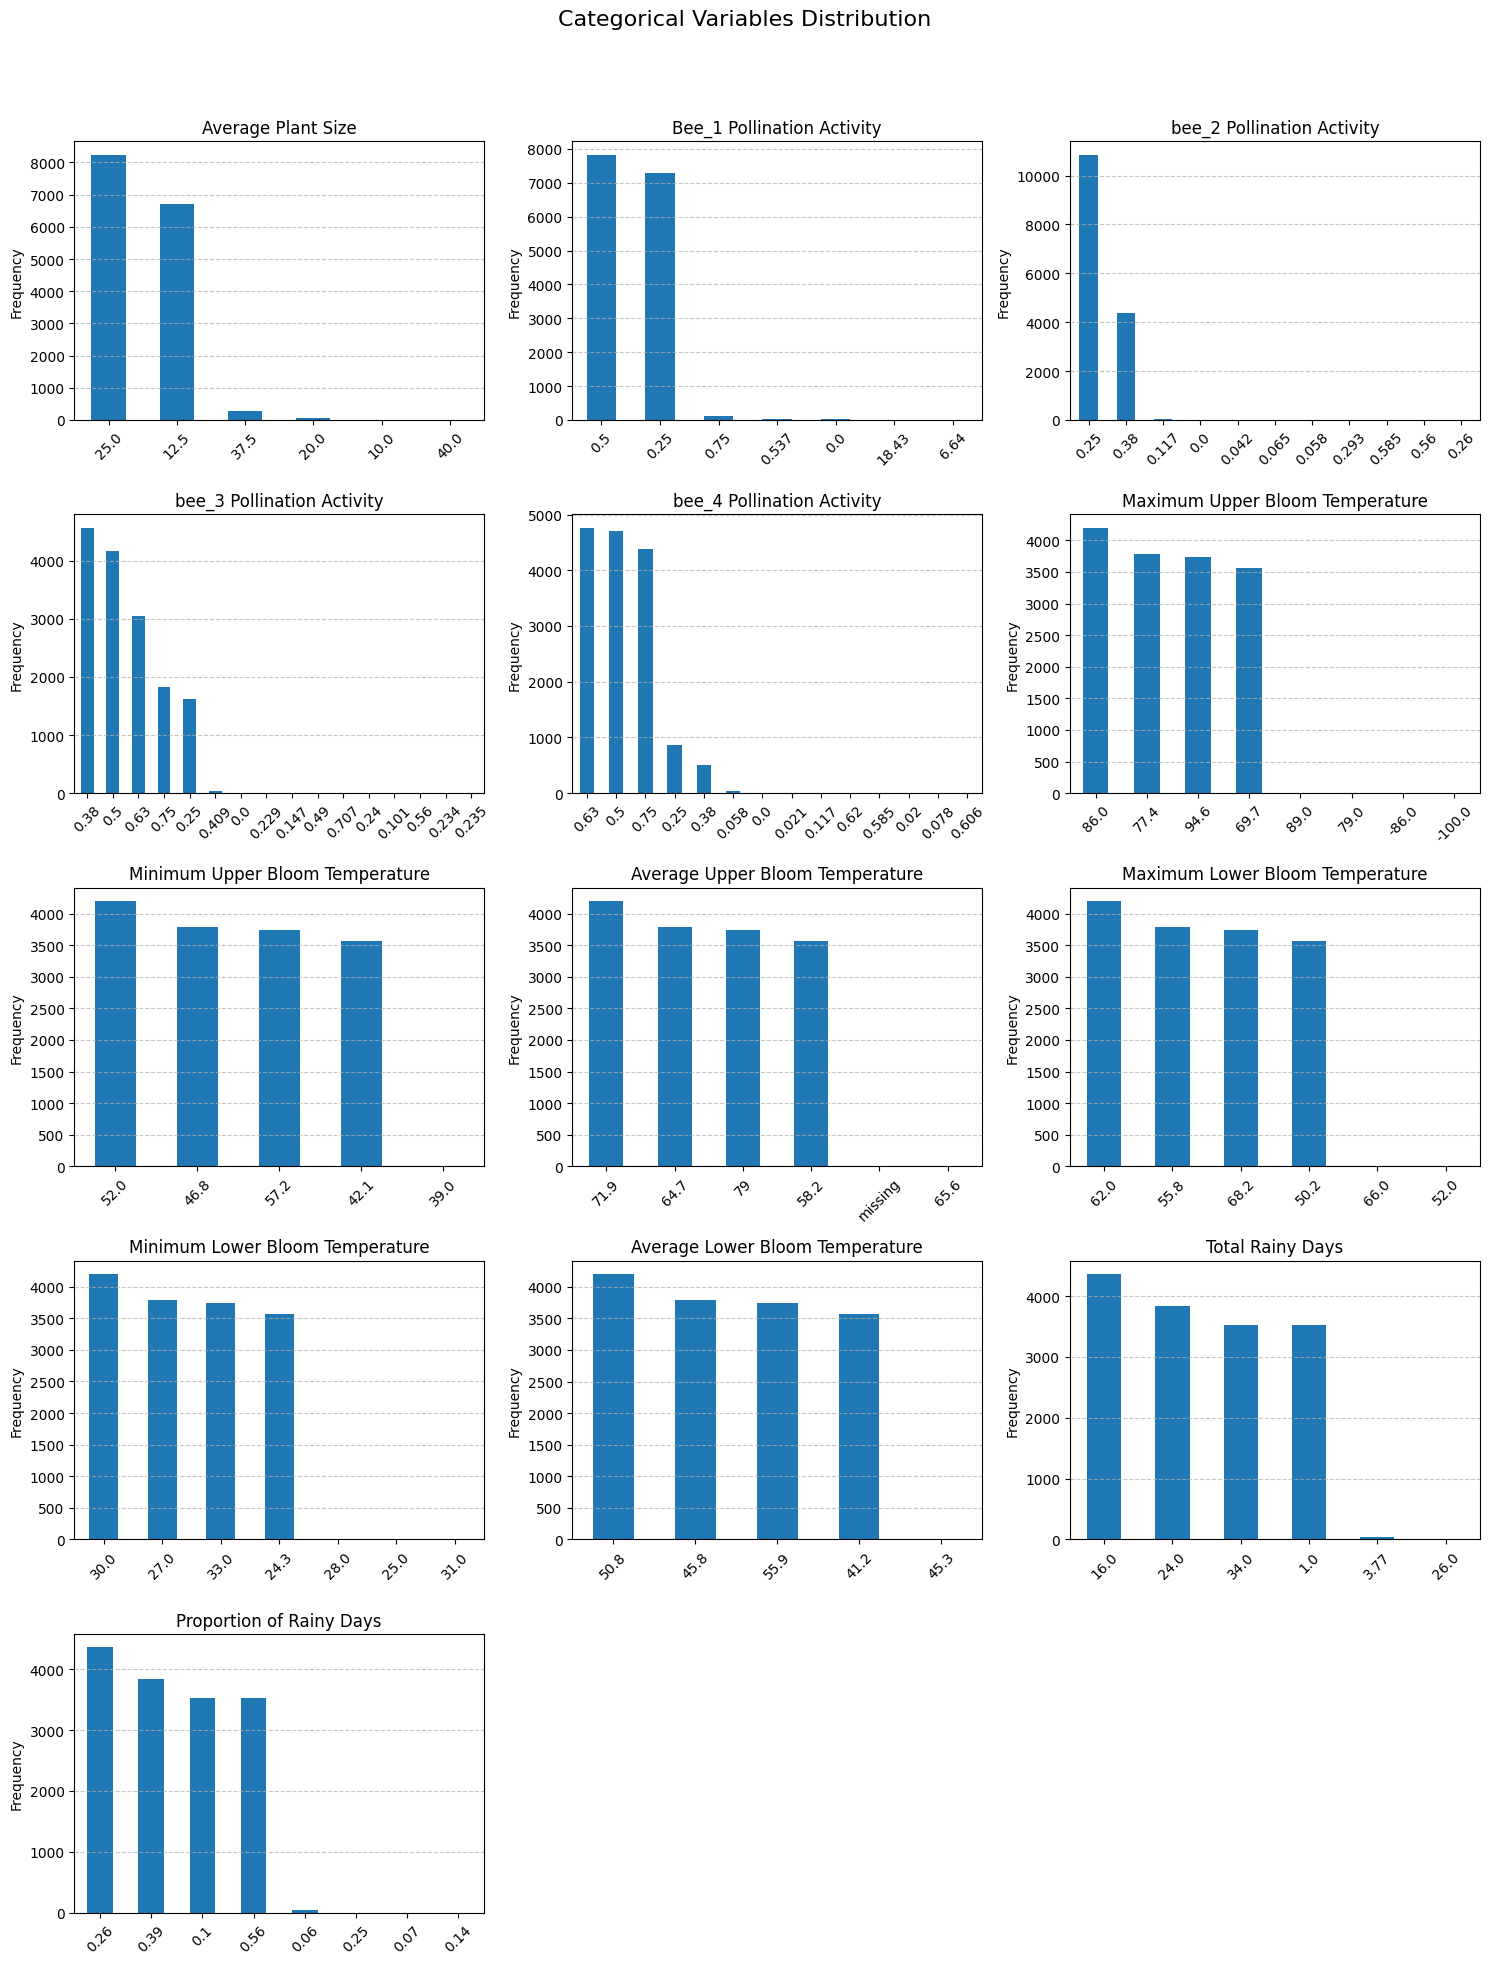

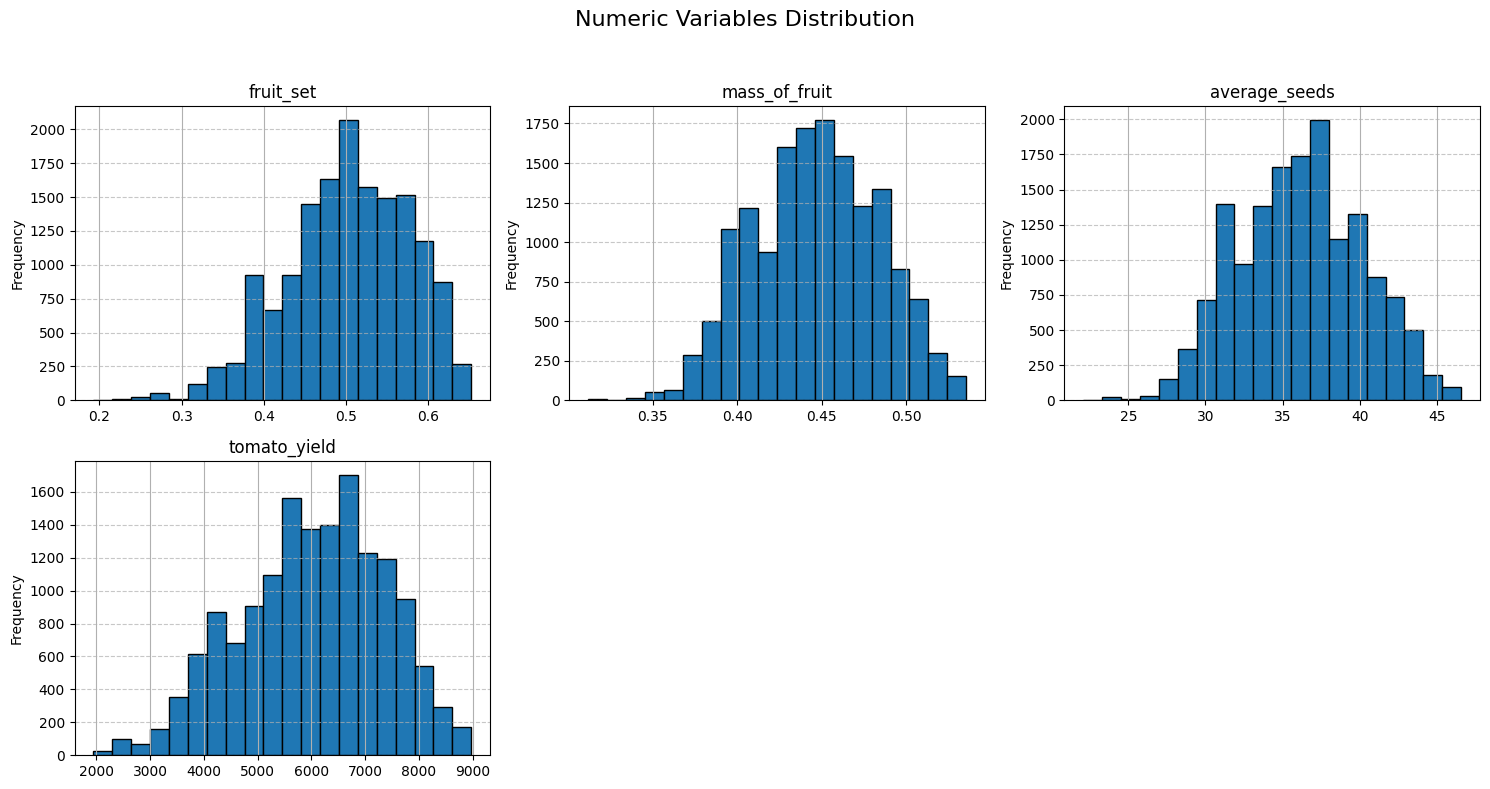

In [10]:
def analyze_dataframe(df, threshold=0.05, exclude_cols=['id']):
    n_rows = df.shape[0]

    # Remove excluded columns
    df = df.drop(columns=[col for col in exclude_cols if col in df.columns])

    # Step 1: Create summary table
    unique_counts = df.nunique()
    unique_ratio = unique_counts / n_rows

    summary = pd.DataFrame({
        'Unique Values': unique_counts,
        'Missing Values': df.isnull().sum(),
        'Unique Ratio': unique_ratio
    })

    summary['Suggested Type'] = np.where(
        (df.dtypes == 'object') | (df.dtypes == 'category') | (unique_ratio < threshold),
        'Categorical',
        'Numeric'
    )

    # Show summary table
    display(summary)

    # Step 2: Separate columns
    categorical_cols = summary[summary['Suggested Type'] == 'Categorical'].index.tolist()
    numeric_cols = summary[summary['Suggested Type'] == 'Numeric'].index.tolist()

    # Step 3: Plot categorical
    if categorical_cols:
        n = len(categorical_cols)
        ncols = 3
        nrows = math.ceil(n / ncols)

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten()
        fig.suptitle('Categorical Variables Distribution', fontsize=16)

        for i, col in enumerate(categorical_cols):
            df[col].value_counts().plot(kind='bar', ax=axes[i])
            axes[i].set_title(col)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
            axes[i].tick_params(axis='x', rotation=45)

        # Remove empty plots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    # Step 4: Plot numeric
    if numeric_cols:
        n = len(numeric_cols)
        ncols = 3
        nrows = math.ceil(n / ncols)

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten()
        fig.suptitle('Numeric Variables Distribution', fontsize=16)

        for i, col in enumerate(numeric_cols):
            df[col].hist(bins=20, edgecolor='black', ax=axes[i])
            axes[i].set_title(col)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('Frequency')
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Remove empty plots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    # Step 5: Return summary table

analyze_dataframe(tomatoes_df)

The distribution plots validate our decision rule for classifying variables: features with fewer than 5% unique values behave like categorical variables, while the rest exhibit continuous behavior, justifying their classification as numerical variables.

##2 - Data Preparation

###2.1- Missing Values Analysis: Are There Any, and in Which Variables?

In [11]:
desc = pd.DataFrame({
    'Non-Null Count': tomatoes_df.notnull().sum(),
    'Dtype': tomatoes_df.dtypes
})
desc.style.applymap(lambda v: 'background-color: #1B2631')


C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3498628179.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  desc.style.applymap(lambda v: 'background-color: #1B2631')


,Non-Null Count,Dtype
id,15289,int64
Average Plant Size,15289,float64
Bee_1 Pollination Activity,15289,float64
bee_2 Pollination Activity,15289,float64
bee_3 Pollination Activity,15289,float64
bee_4 Pollination Activity,15289,float64
Maximum Upper Bloom Temperature,15289,float64
Minimum Upper Bloom Temperature,15289,float64
Average Upper Bloom Temperature,15289,object
Maximum Lower Bloom Temperature,15289,float64


When we initially described the general structure of the dataset, we noticed that the only column with data type object is Average Upper Bloom Temperature. This suggests that it may contain missing values represented as text. We will now verify this assumption.

In [12]:
print(tomatoes_df['Average Upper Bloom Temperature'].unique())

['58.2' '71.9' '64.7' '79' '65.6' 'missing']



As we can see, there are missing values represented as the string 'missing', and therefore we will handle these entries accordingly.

In [13]:
tomatoes_df['Average Upper Bloom Temperature'] = tomatoes_df['Average Upper Bloom Temperature'].replace('missing', np.nan)

tomatoes_df['Average Upper Bloom Temperature'] = pd.to_numeric(tomatoes_df['Average Upper Bloom Temperature'])

mean_value = tomatoes_df['Average Upper Bloom Temperature'].mean()

tomatoes_df['Average Upper Bloom Temperature'] = tomatoes_df['Average Upper Bloom Temperature'].fillna(mean_value)


After imputing the missing values with the mean, we will re-examine the unique values in the column and verify its data type.

In [14]:
print(tomatoes_df['Average Upper Bloom Temperature'].unique())
print(tomatoes_df['Average Lower Bloom Temperature'].dtype)

[58.2        71.9        64.7        79.         65.6        68.65610442]
float64


We can now confirm that the issue has been successfully resolved.

###2.2 - Identifying and Handling **Outliers**

We will use a box plot to visually identify potential outliers in the data

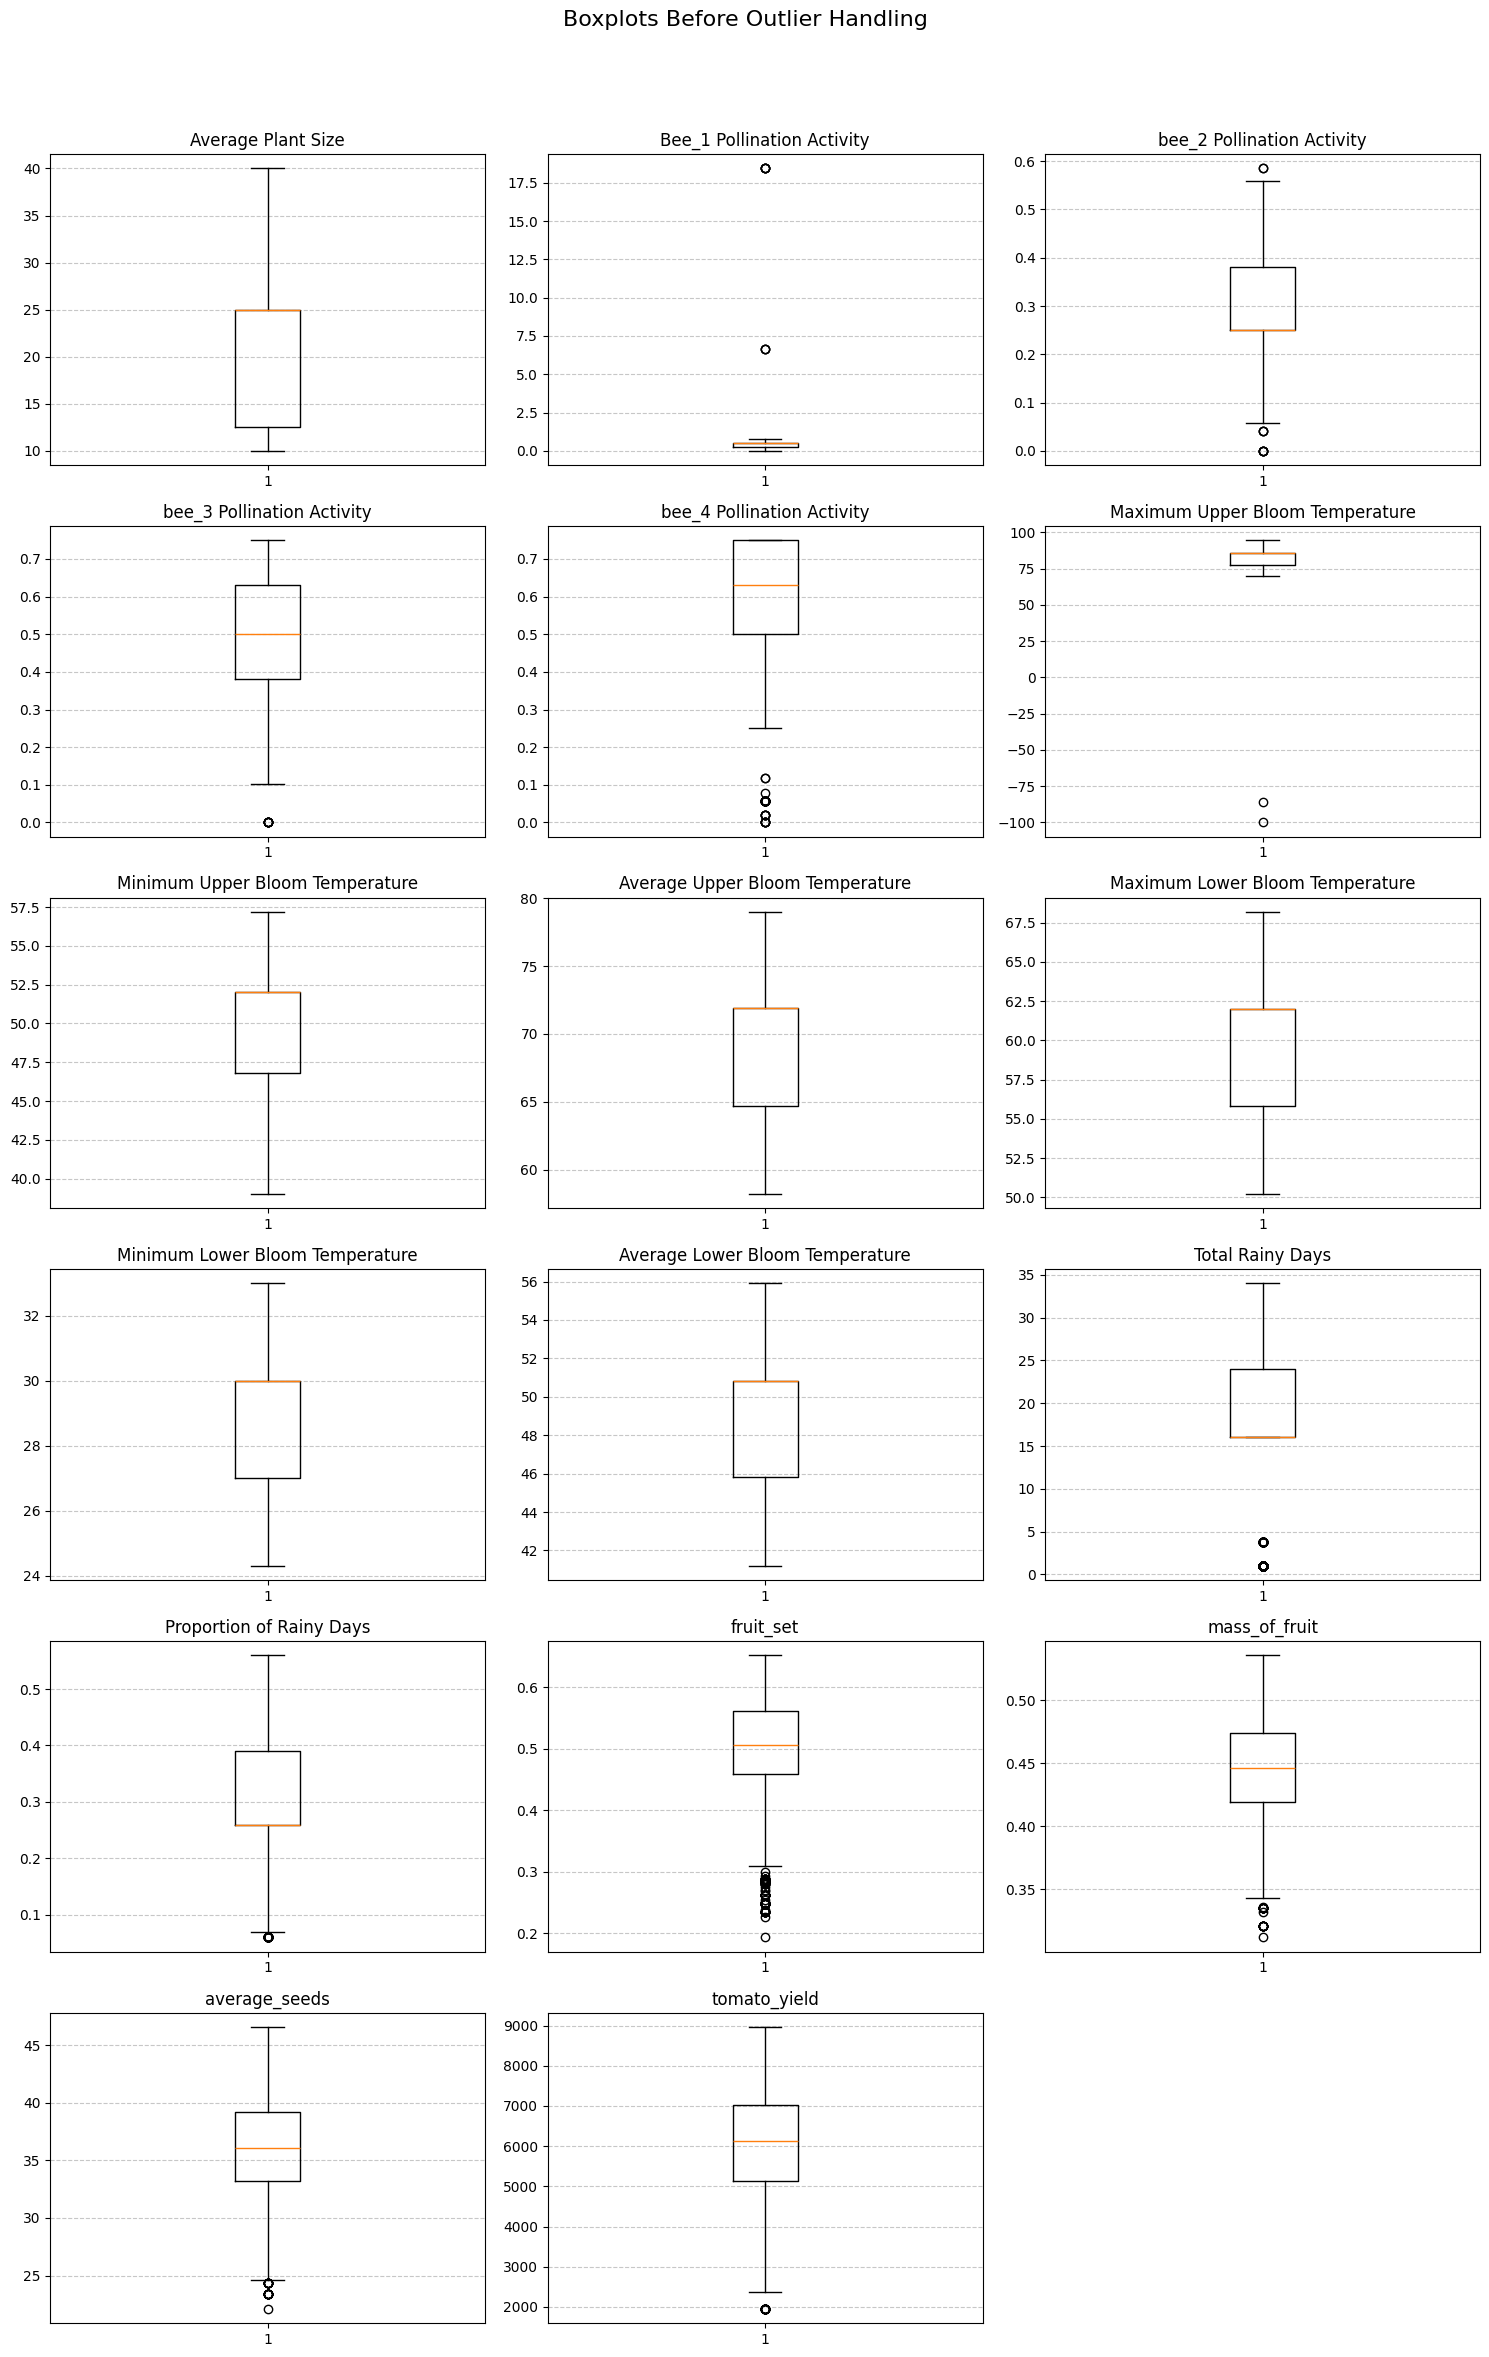

In [15]:
def plot_boxplots_before_outliers(df, exclude_cols=['id']):
    """
    Plots boxplots for all numeric columns before outlier handling.

    Parameters:
    - df: pandas DataFrame
    - exclude_cols: list of columns to exclude (default ['id'])
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    n = len(numeric_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()
    fig.suptitle('Boxplots Before Outlier Handling', fontsize=16)

    for i, column in enumerate(numeric_cols):
        axes[i].boxplot(df[column].dropna())
        axes[i].set_title(column)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)


    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_boxplots_before_outliers(tomatoes_df)

In [16]:
def extract_outliers(df, method='iqr', z_thresh=3, exclude_cols=['id']):
    """
    Extracts outlier rows from all numeric columns.

    Returns:
    - DataFrame containing only rows with outliers.
    - DataFrame summary of outliers count per column.
    """
    df_temp = df.copy()
    numeric_cols = df_temp.select_dtypes(include=['number']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    outlier_rows = pd.Series(False, index=df_temp.index)
    outliers_count = {}

    for column in numeric_cols:
        if method == 'iqr':
            Q1 = df_temp[column].quantile(0.25)
            Q3 = df_temp[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = (df_temp[column] < lower) | (df_temp[column] > upper)
        elif method == 'zscore':
            z_scores = zscore(df_temp[column].dropna())
            outliers = np.abs(z_scores) > z_thresh
            outliers_full = pd.Series(False, index=df_temp.index)
            outliers_full[df_temp[column].dropna().index[outliers]] = True
            outliers = outliers_full
        else:
            raise ValueError("method must be 'iqr' or 'zscore'")

        outliers_count[column] = outliers.sum()
        outlier_rows = outlier_rows | outliers

    outliers_df = df_temp[outlier_rows]

    summary = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers Count'])

    return outliers_df, summary

outliers_df, summary = extract_outliers(tomatoes_df, method='zscore')
print("Summary of outliers:")
print(summary)
print("\nOutlier rows:")
print(outliers_df)

Summary of outliers:
                                 Outliers Count
Average Plant Size                            2
Bee_1 Pollination Activity                    8
bee_2 Pollination Activity                   15
bee_3 Pollination Activity                    8
bee_4 Pollination Activity                   56
Maximum Upper Bloom Temperature               2
Minimum Upper Bloom Temperature               0
Average Upper Bloom Temperature               0
Maximum Lower Bloom Temperature               0
Minimum Lower Bloom Temperature               0
Average Lower Bloom Temperature               0
Total Rainy Days                              0
Proportion of Rainy Days                      0
fruit_set                                    57
mass_of_fruit                                22
average_seeds                                14
tomato_yield                                 26

Outlier rows:
          id  Average Plant Size  Bee_1 Pollination Activity  \
287      287                25.0    

we will try two differnt methods to detect outliers: <br>
1. IQR - where values falling below Q1 – 1.5×IQR or above Q3 + 1.5×IQR are considered potential outliers.<br>
2. Z-scor -  identifies outliers by measuring how many standard deviations a data point is from the mean; values with an absolute Z-score above a certain threshold (commonly 3) are considered outliers.

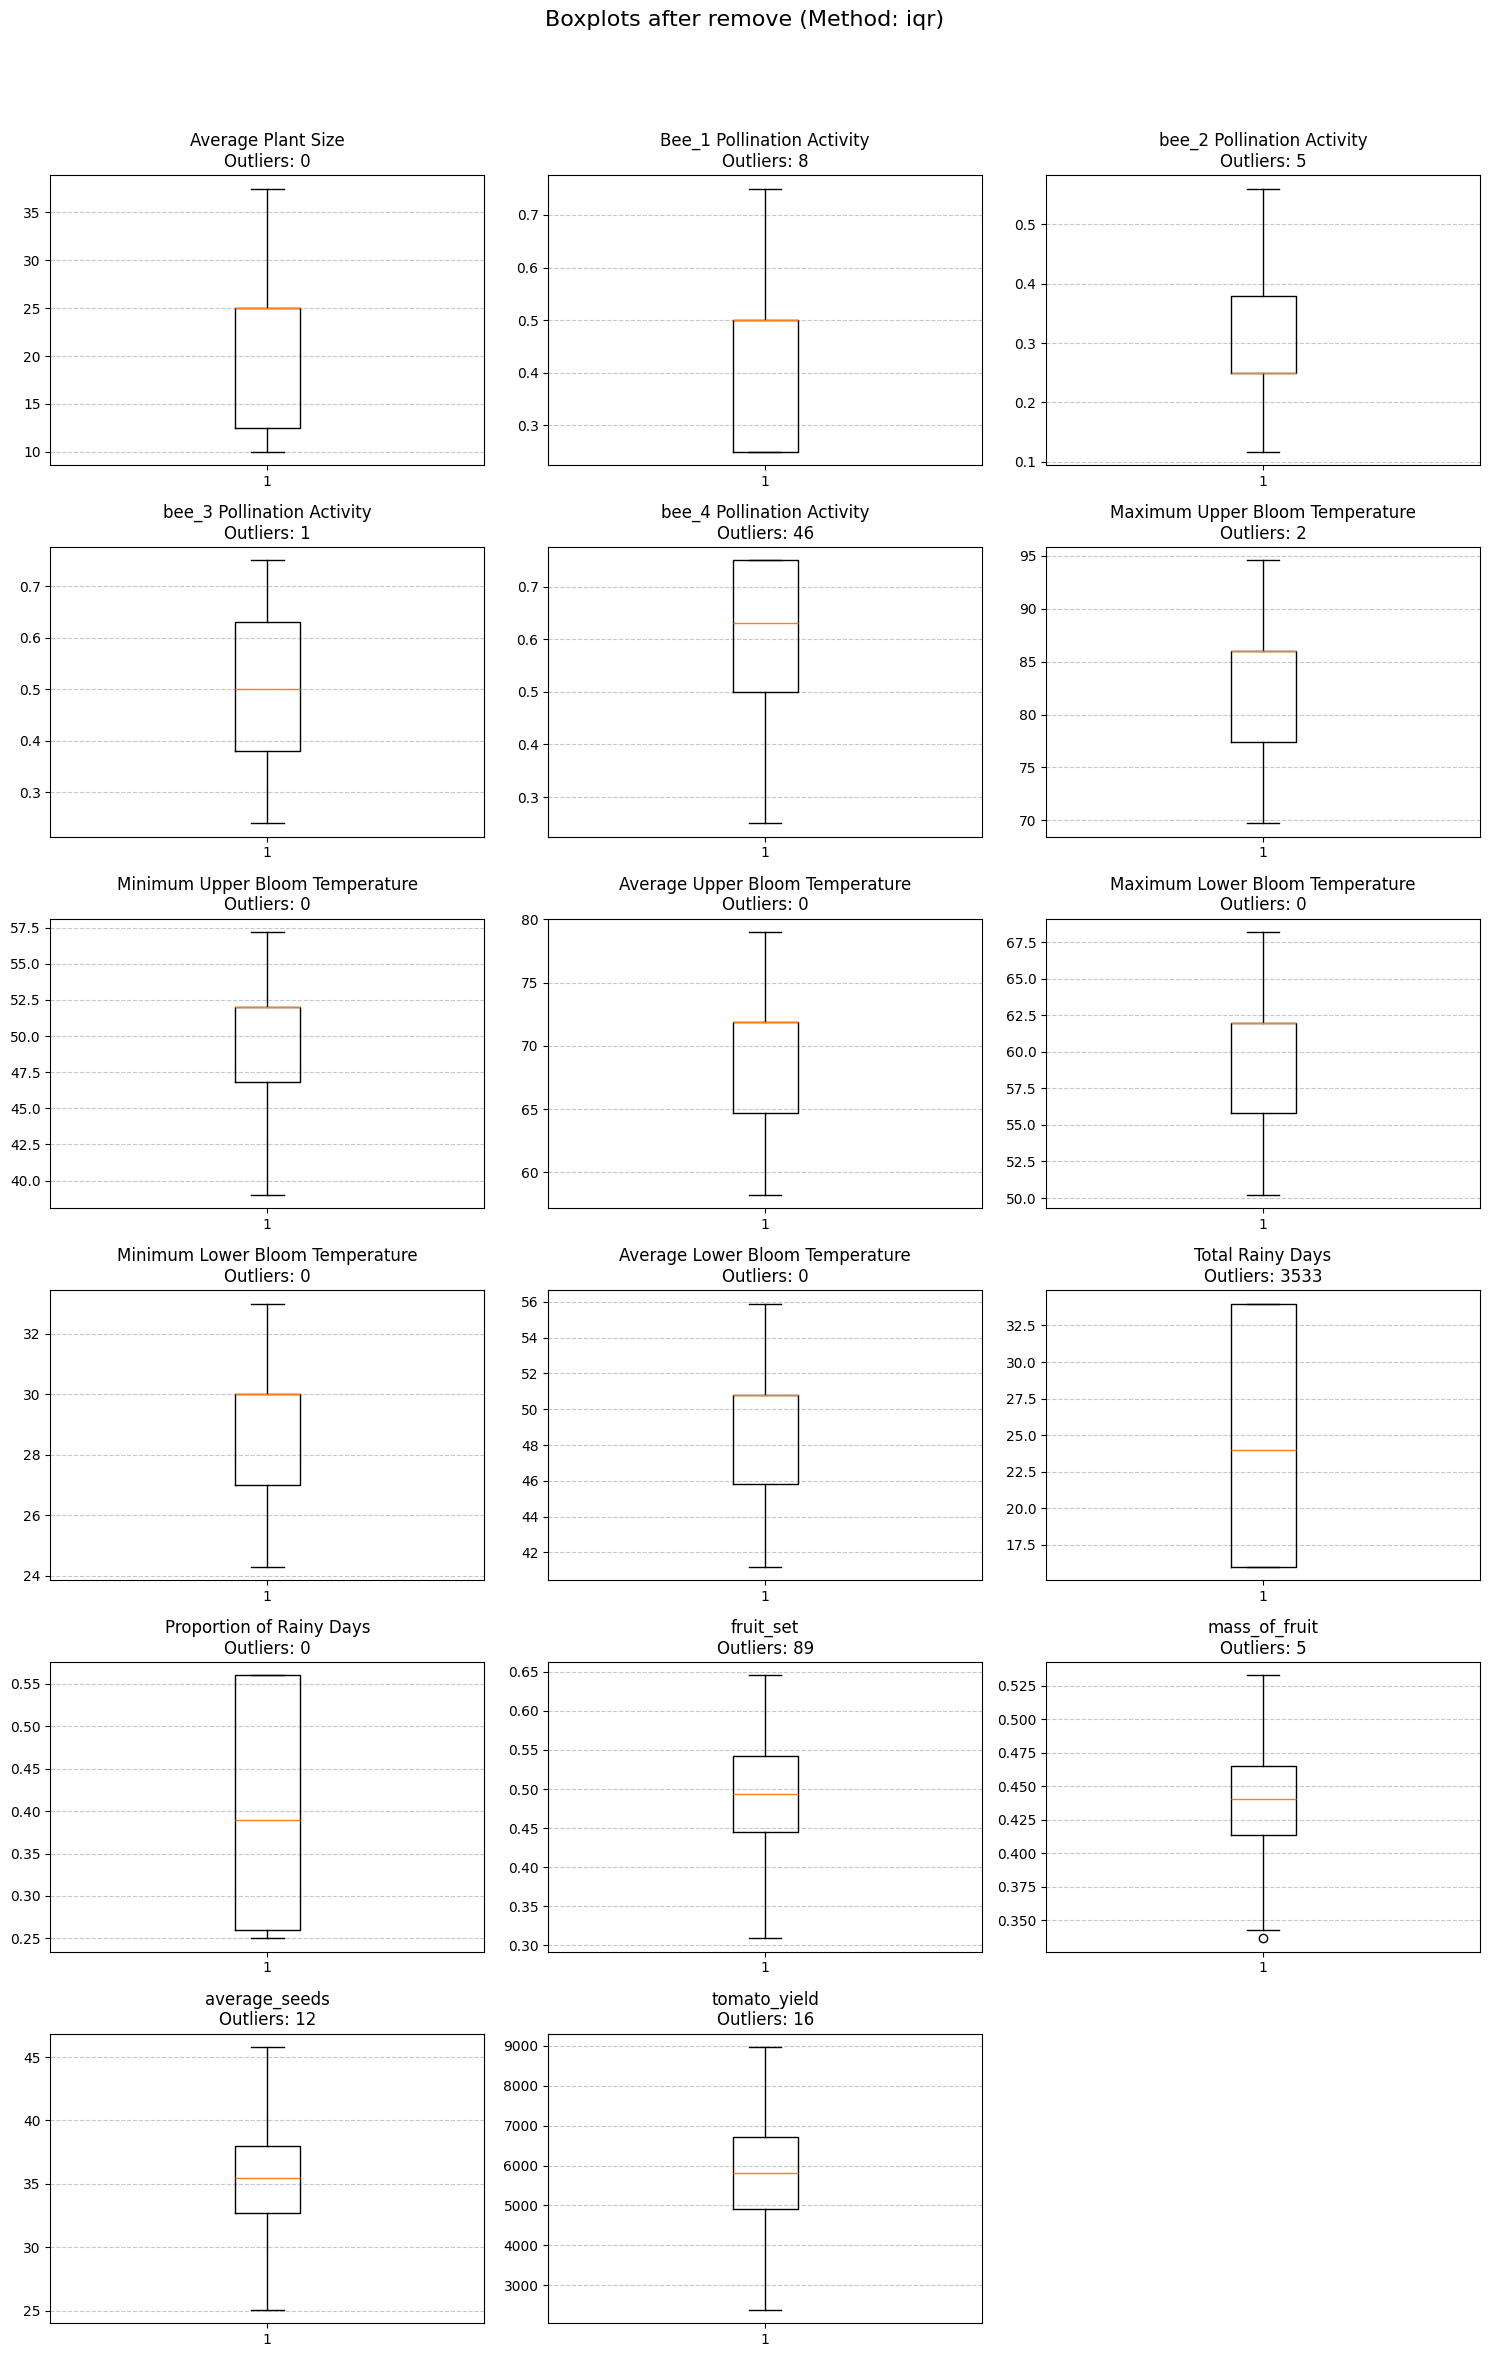

,Outliers Count
Average Plant Size,0
Bee_1 Pollination Activity,8
bee_2 Pollination Activity,5
bee_3 Pollination Activity,1
bee_4 Pollination Activity,46
Maximum Upper Bloom Temperature,2
Minimum Upper Bloom Temperature,0
Average Upper Bloom Temperature,0
Maximum Lower Bloom Temperature,0
Minimum Lower Bloom Temperature,0



✅ Outlier handling completed for all numeric columns.


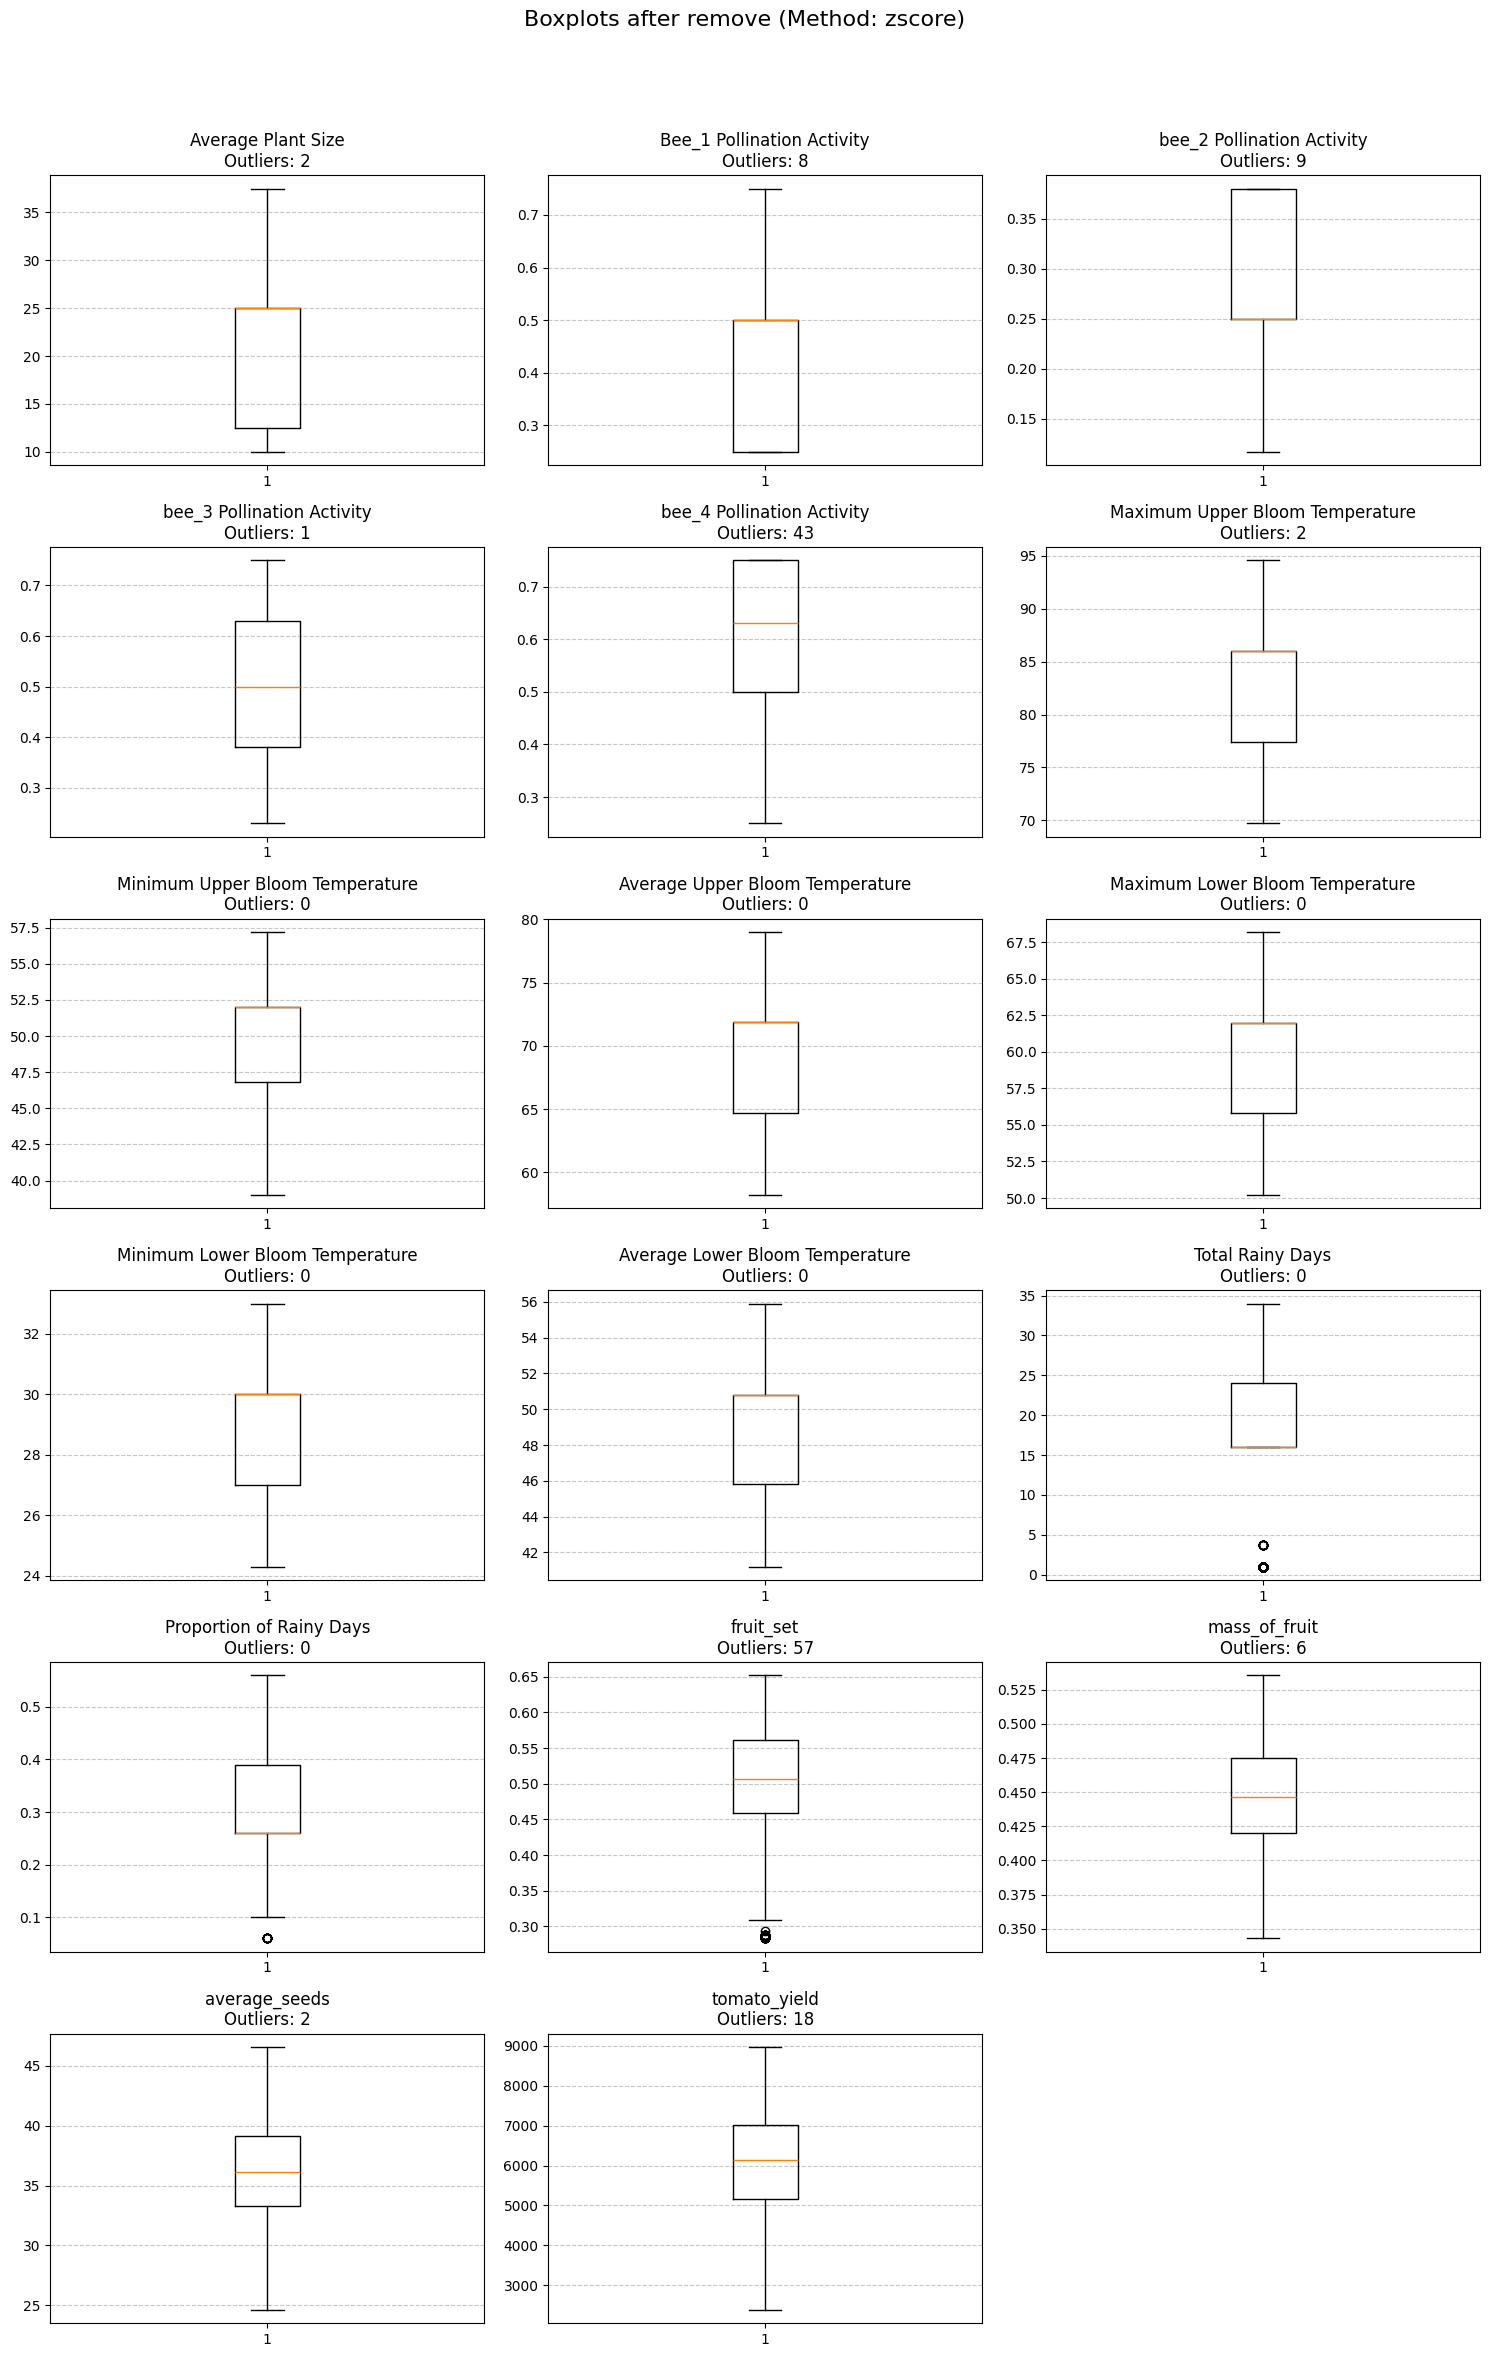

,Outliers Count
Average Plant Size,2
Bee_1 Pollination Activity,8
bee_2 Pollination Activity,9
bee_3 Pollination Activity,1
bee_4 Pollination Activity,43
Maximum Upper Bloom Temperature,2
Minimum Upper Bloom Temperature,0
Average Upper Bloom Temperature,0
Maximum Lower Bloom Temperature,0
Minimum Lower Bloom Temperature,0



✅ Outlier handling completed for all numeric columns.


In [17]:

def detect_and_handle_outliers_all(df, method, action='remove', z_thresh=3, exclude_cols=['id']):
    df_clean = df.copy()


    numeric_cols = df_clean.select_dtypes(include=['number']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    outliers_count = {}

    for column in numeric_cols:
        if method == 'iqr':
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)

        elif method == 'zscore':
            z_scores = zscore(df_clean[column].dropna())
            outliers = np.abs(z_scores) > z_thresh
            outliers_full = pd.Series(False, index=df_clean.index)
            outliers_full[df_clean[column].dropna().index[outliers]] = True
            outliers = outliers_full

        else:
            raise ValueError("method must be 'iqr' or 'zscore'")

        outliers_count[column] = outliers.sum()

        if action == 'remove':
            df_clean = df_clean[~outliers]
        elif action == 'replace':
            median_value = df_clean[column].median()
            df_clean.loc[outliers, column] = median_value
        elif action == 'keep':
            pass
        else:
            raise ValueError("action must be 'remove', 'replace', or 'keep'")

    n = len(numeric_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()
    fig.suptitle(f'Boxplots after {action} (Method: {method})', fontsize=16)

    for i, column in enumerate(numeric_cols):
        axes[i].boxplot(df_clean[column].dropna())
        axes[i].set_title(f"{column}\nOutliers: {outliers_count[column]}")
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    outlier_summary = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers Count'])
    display(outlier_summary)

    print('\n✅ Outlier handling completed for all numeric columns.')

    return df_clean, outlier_summary

detect_and_handle_outliers_all(tomatoes_df, method='iqr')
df_clean, _ = detect_and_handle_outliers_all(tomatoes_df, method='zscore')

We chose to use the Z-score method for outlier detection, as the IQR method identified an excessively large number of "outliers" in the Total Rainy Days column (3,569 values).
Therefore, we handled outliers in the dataset using the Z-score approach, which better fits the distribution of the data in this case.

###2.3 - Normalization of Numerical Values

In [18]:
def standardize_numeric_columns(df):
    df_std = df.copy()

    numeric_cols = ['fruit_set', 'mass_of_fruit', 'average_seeds', 'tomato_yield']

    scaler = StandardScaler()
    df_std[numeric_cols] = scaler.fit_transform(df_std[numeric_cols])

    print(f'Standardized columns: {numeric_cols}')
    return df_std

st_clean_df = standardize_numeric_columns(df_clean)
desc = st_clean_df.describe().T
desc.style.applymap(lambda v: 'background-color: # 959595').format("{:.2f}")

Standardized columns: ['fruit_set', 'mass_of_fruit', 'average_seeds', 'tomato_yield']


C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3327506838.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  desc.style.applymap(lambda v: 'background-color: # 959595').format("{:.2f}")


,count,mean,std,min,25%,50%,75%,max
id,15141.00,7641.86,4411.69,0.00,3822.00,7638.00,11455.00,15288.00
Average Plant Size,15141.00,19.67,6.58,10.00,12.50,25.00,25.00,37.50
Bee_1 Pollination Activity,15141.00,0.38,0.13,0.25,0.25,0.50,0.50,0.75
bee_2 Pollination Activity,15141.00,0.29,0.06,0.12,0.25,0.25,0.38,0.38
bee_3 Pollination Activity,15141.00,0.49,0.15,0.23,0.38,0.50,0.63,0.75
bee_4 Pollination Activity,15141.00,0.60,0.14,0.25,0.50,0.63,0.75,0.75
Maximum Upper Bloom Temperature,15141.00,82.14,9.15,69.70,77.40,86.00,86.00,94.60
Minimum Upper Bloom Temperature,15141.00,49.66,5.55,39.00,46.80,52.00,52.00,57.20
Average Upper Bloom Temperature,15141.00,68.63,7.64,58.20,64.70,71.90,71.90,79.00
Maximum Lower Bloom Temperature,15141.00,59.21,6.61,50.20,55.80,62.00,62.00,68.20


**We standardizes selected numerical columns in the DataFrame using Z-score normalization (also known as standardization). Specifically:<br>**

1. The columns 'fruit_set', 'mass_of_fruit', 'average_seeds', and 'tomato_yield' are selected for standardization.

2. StandardScaler from sklearn.preprocessing is used to transform each of these columns so that they have a mean of 0 and a standard deviation of 1.

###2.4- Feature Distribution Visualization Following Outlier Treatment and Normalization








C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3280137606.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3280137606.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3280137606.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\3280137606.py:42: UserWarning: set_ticklabels() should only be used with a fixed number 

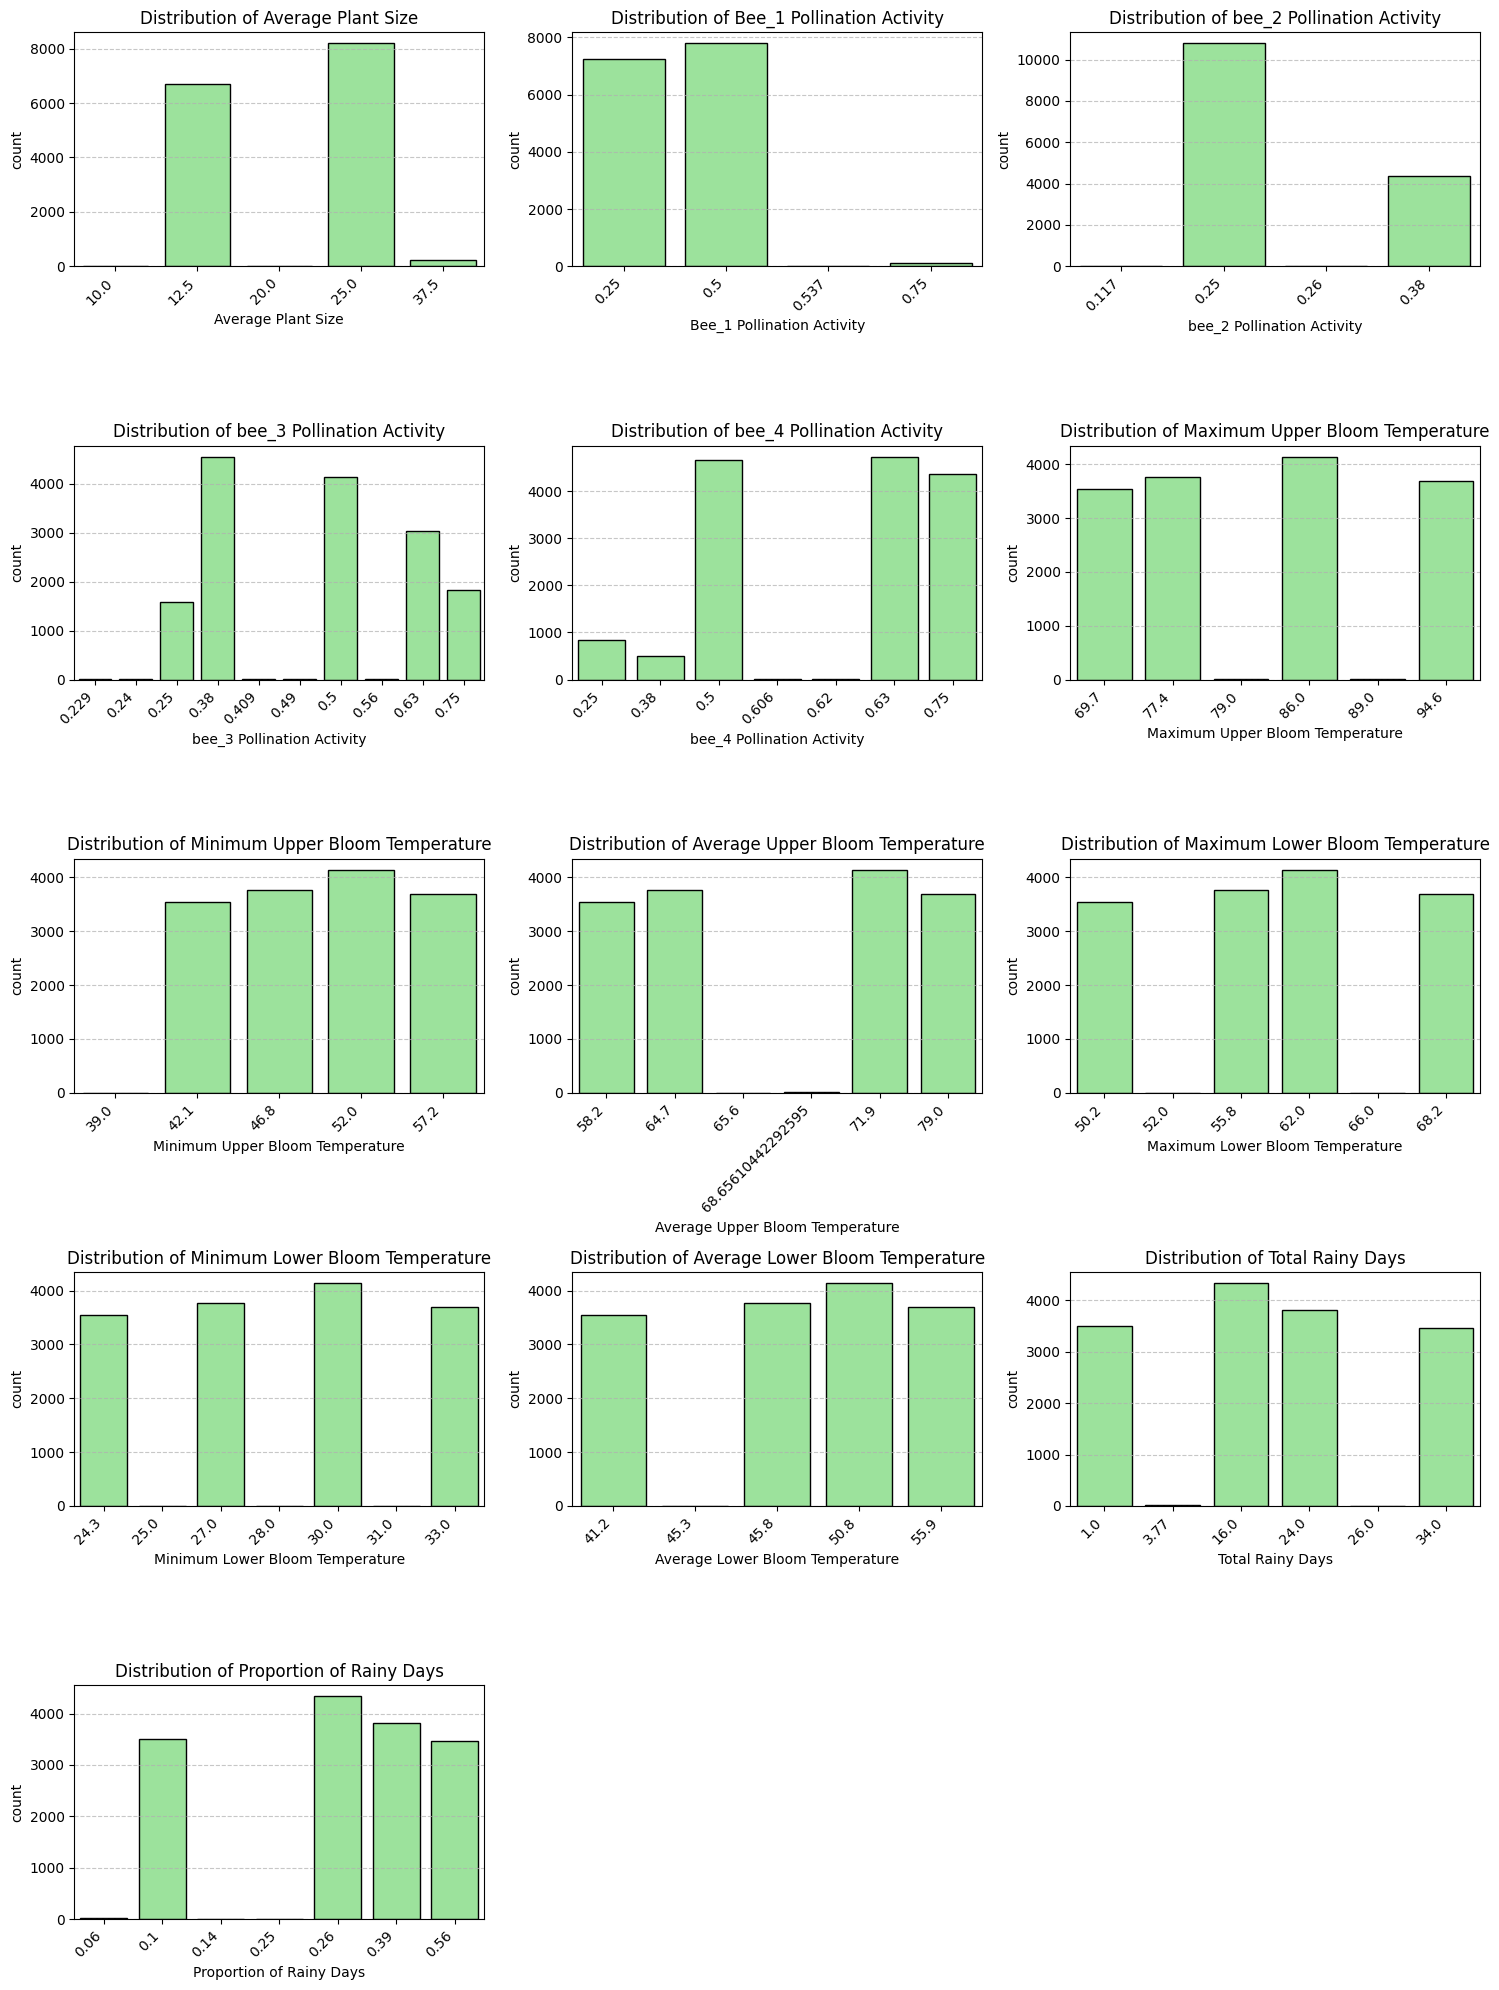

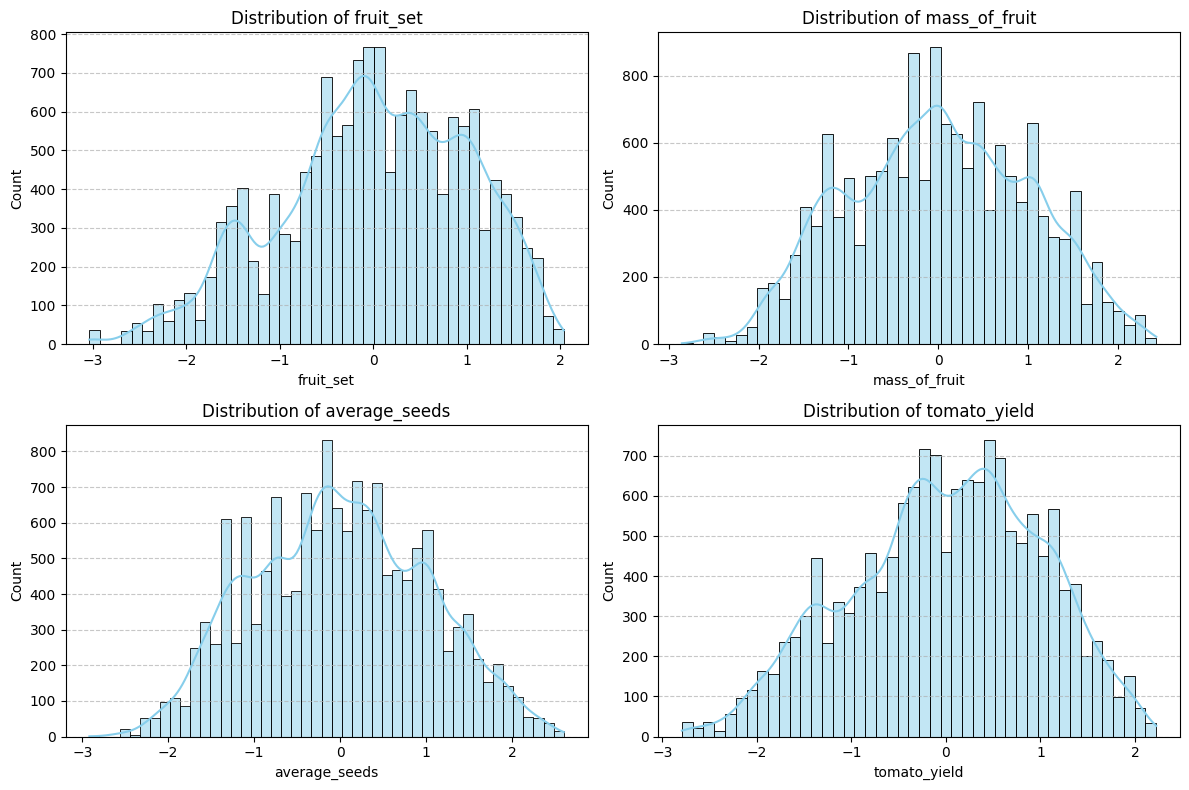

In [19]:
categorical_cols = [
    'Average Plant Size', 'Bee_1 Pollination Activity', 'bee_2 Pollination Activity',
    'bee_3 Pollination Activity', 'bee_4 Pollination Activity',
    'Maximum Upper Bloom Temperature', 'Minimum Upper Bloom Temperature',
    'Average Upper Bloom Temperature', 'Maximum Lower Bloom Temperature',
    'Minimum Lower Bloom Temperature', 'Average Lower Bloom Temperature',
    'Total Rainy Days', 'Proportion of Rainy Days'
]
numeric_cols = ['fruit_set', 'mass_of_fruit', 'average_seeds', 'tomato_yield']

def plot_numeric_grid(df, numeric_cols):
    n = len(numeric_cols)
    ncols = 2
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def plot_categorical_grid(df, categorical_cols):
    n = len(categorical_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, color='lightgreen', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_grid(st_clean_df, categorical_cols)
plot_numeric_grid(st_clean_df, numeric_cols)
plt.show()


The distributions of all numerical features appear to be centered around zero and scaled similarly, indicating that normalization (standardization) has been successfully applied.

###2.5 - Descriptive Analysis of Numerical Variables

In [20]:
summary = st_clean_df[numeric_cols].describe().T
summary['unique_values'] = st_clean_df[numeric_cols].nunique()

display(summary.style.background_gradient(cmap='Blues').format("{:.2f}"))

,count,mean,std,min,25%,50%,75%,max,unique_values
fruit_set,15141.00,0.00,1.00,-3.04,-0.62,0.04,0.79,2.04,1501.00
mass_of_fruit,15141.00,-0.00,1.00,-2.85,-0.75,-0.01,0.76,2.43,1496.00
average_seeds,15141.00,-0.00,1.00,-2.92,-0.74,-0.03,0.74,2.60,2045.00
tomato_yield,15141.00,0.00,1.00,-2.79,-0.68,0.06,0.74,2.23,775.00


###2.6 - Frequency Analysis of Categorical Variables

In [21]:
categorical_cols = [
    'Average Plant Size', 'Bee_1 Pollination Activity', 'bee_2 Pollination Activity',
    'bee_3 Pollination Activity', 'bee_4 Pollination Activity',
    'Maximum Upper Bloom Temperature', 'Minimum Upper Bloom Temperature',
    'Average Upper Bloom Temperature', 'Maximum Lower Bloom Temperature',
    'Minimum Lower Bloom Temperature', 'Average Lower Bloom Temperature',
    'Total Rainy Days', 'Proportion of Rainy Days'
]
cat_summary = []
for col in categorical_cols:
    for val, count in st_clean_df[col].value_counts().items():
        cat_summary.append({
            "Feature": col,
            "Category": val,
            "Count": count,
            "Percent": round(100 * count / len(st_clean_df), 2)
        })

summary_df = pd.DataFrame(cat_summary)
display(summary_df.style.background_gradient(cmap='Blues'))

,Feature,Category,Count,Percent
0,Average Plant Size,25.000000,8188,54.080000
1,Average Plant Size,12.500000,6697,44.230000
2,Average Plant Size,37.500000,247,1.630000
3,Average Plant Size,20.000000,8,0.050000
4,Average Plant Size,10.000000,1,0.010000
5,Bee_1 Pollination Activity,0.500000,7787,51.430000
6,Bee_1 Pollination Activity,0.250000,7245,47.850000
7,Bee_1 Pollination Activity,0.750000,106,0.700000
8,Bee_1 Pollination Activity,0.537000,3,0.020000
9,bee_2 Pollination Activity,0.250000,10778,71.180000


##3 – Correlation Analysis and Data Relationship Insights

###3.1 – Analysis of the Correlation Between 'tomato_yield' and Each Independent Variable


We used Pearson correlation to measure the linear relationship between each variable and the continuous numerical target variable 'tomato_yield', with the correlation coefficient ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).

C:\Users\Menashe Lorenzi\AppData\Local\Temp\ipykernel_11528\264728633.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with Tomato Yield', y='Feature', data=correlations_df, palette='coolwarm')


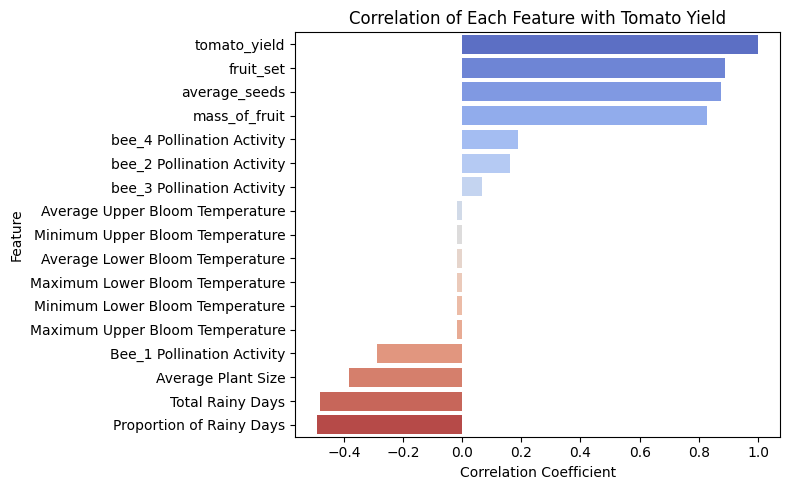

tomato_yield                       1.000000
fruit_set                          0.887666
average_seeds                      0.873695
mass_of_fruit                      0.828310
bee_4 Pollination Activity         0.187060
bee_2 Pollination Activity         0.160939
bee_3 Pollination Activity         0.066978
Average Upper Bloom Temperature   -0.016546
Minimum Upper Bloom Temperature   -0.016805
Average Lower Bloom Temperature   -0.016966
Maximum Lower Bloom Temperature   -0.017086
Minimum Lower Bloom Temperature   -0.017204
Maximum Upper Bloom Temperature   -0.017404
Bee_1 Pollination Activity        -0.287213
Average Plant Size                -0.381544
Total Rainy Days                  -0.482227
Proportion of Rainy Days          -0.490211
Name: tomato_yield, dtype: float64


In [22]:

correlations = st_clean_df.corr(numeric_only=True)['tomato_yield'].sort_values(ascending=False)


correlations = correlations.drop('id', errors='ignore')


correlations_df = correlations.reset_index()
correlations_df.columns = ['Feature', 'Correlation with Tomato Yield']


plt.figure(figsize=(8, 5))
sns.barplot(x='Correlation with Tomato Yield', y='Feature', data=correlations_df, palette='coolwarm')
plt.title('Correlation of Each Feature with Tomato Yield')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


print(correlations)


The correlation plot shows that 'fruit_set', 'average_seeds', and 'mass_of_fruit' have strong positive correlations with tomato_yield, while features like 'Proportion of Rainy Days' and 'Total Rainy Days' exhibit moderate negative correlations.

###3.2 – Correlation Matrix to Explore All Pairwise Relationships

The heatmap below presents the Pearson correlation matrix for all numerical features in the dataset. This visualization allows us to detect strong linear relationships and potential multicollinearity between variables—key insights for effective feature selection and robust model building. The color gradient emphasizes both the strength and direction of correlations, making it easier to identify meaningful patterns at a glance.

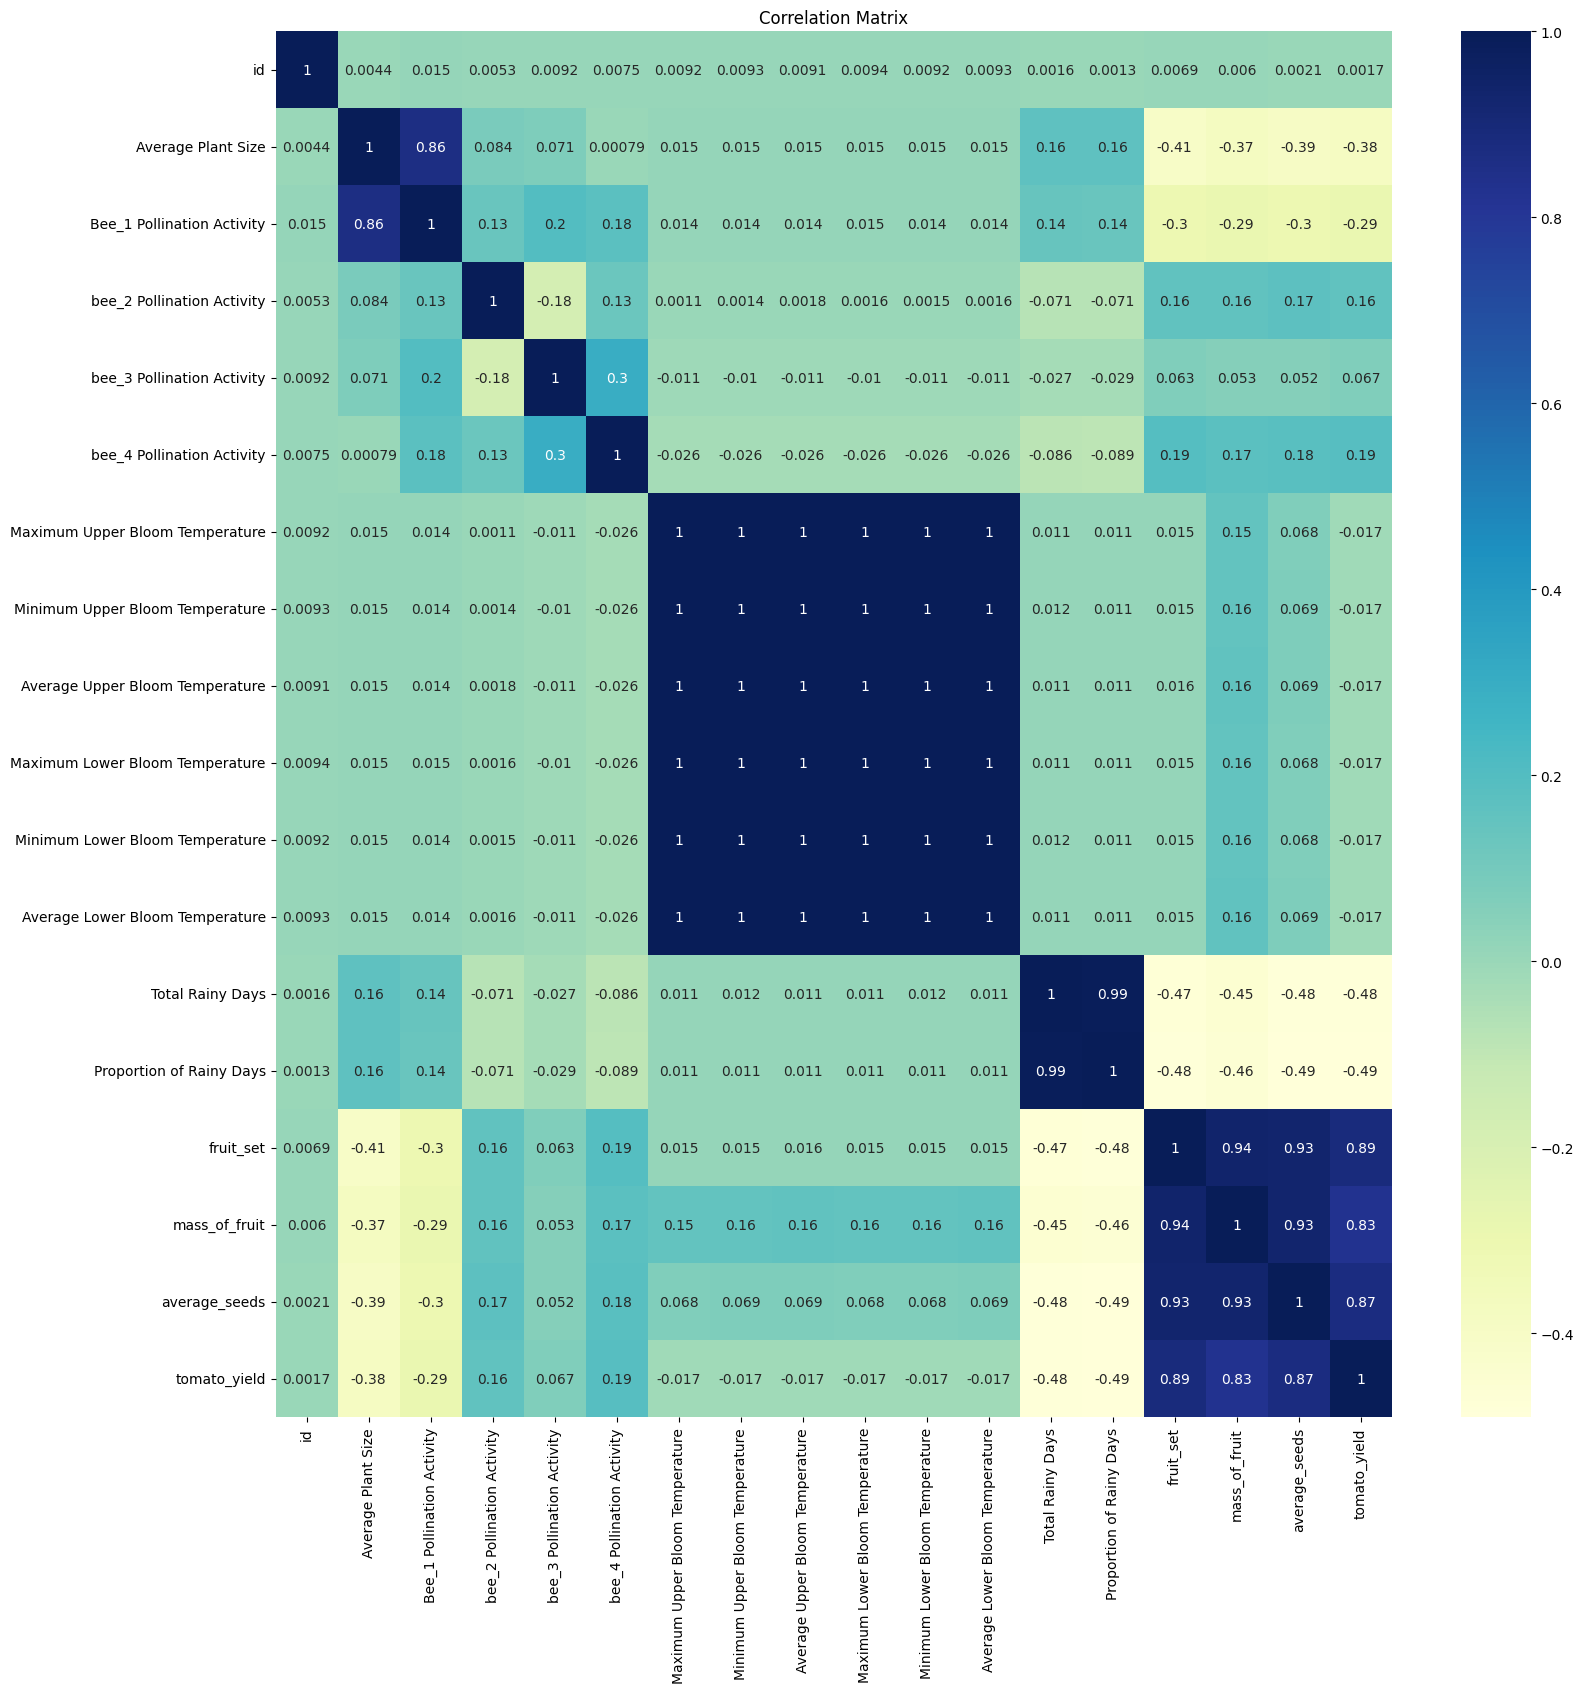

In [23]:
plt.figure(figsize=(18, 18))
sns.heatmap(st_clean_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

The full Pearson correlation matrix reveals one particularly notable insight beyond the direct correlations with tomato_yield.<br>
**There is a strong correlation (0.86) between Bee_1 Pollination Activity and Average Plant Size, suggesting that increased bee activity might promote plant growth — a potentially actionable agricultural finding.<br>**

we have two more insight - <br>

Redundant Features:
Several features, such as the bloom temperature variables and the two rainy days features, are almost perfectly correlated, indicating redundancy. Keeping just one from each group is recommended.<br>

Multicollinearity Risk:
fruit_set, mass_of_fruit, and average_seeds show very high correlation with each other (>0.9), which may lead to multicollinearity in modeling.




###3.3 - Visualization of the relationship between the annual tomato yield (tomato_yield) and each numerical variable



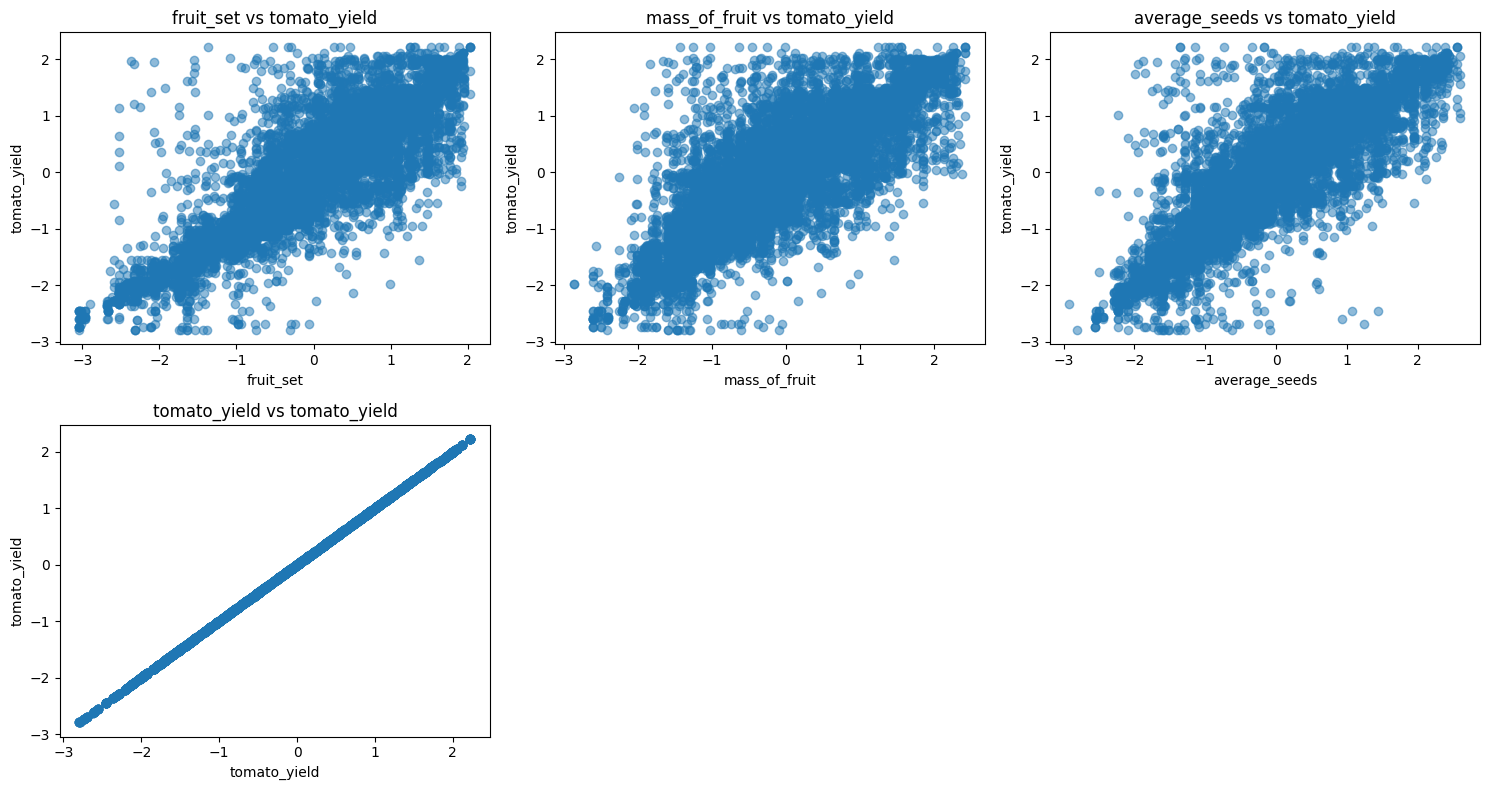

In [24]:
n = len(numeric_cols)
ncols = 3
nrows = -(-n // ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].scatter(st_clean_df[col], st_clean_df['tomato_yield'], alpha=0.5)
    axes[i].set_title(f'{col} vs tomato_yield')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('tomato_yield')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatter plots show a clear positive linear relationship between tomato_yield and each of the variables fruit_set, mass_of_fruit, and average_seeds. As the values of these variables increase, the annual tomato yield tends to increase as well. This supports the idea that these features are strong predictors of tomato production, and their inclusion in a regression model is likely to improve its explanatory power.

###3.4 - Visualization of the relationship between the annual tomato yield (tomato_yield) and each categorical variable



,Categorical Variable,ANOVA p-value,Kruskal-Wallis p-value
0,Average Plant Size,0.000000e+00,None
1,Bee_1 Pollination Activity,3.472219e-285,None
2,bee_2 Pollination Activity,6.550401e-86,None
3,bee_3 Pollination Activity,2.333710e-73,None
4,bee_4 Pollination Activity,9.746565e-163,None
5,Maximum Upper Bloom Temperature,2.693160e-53,None
6,Minimum Upper Bloom Temperature,3.050931e-54,None
7,Average Upper Bloom Temperature,3.073547e-53,None
8,Maximum Lower Bloom Temperature,2.002434e-53,None
9,Minimum Lower Bloom Temperature,2.264256e-52,None


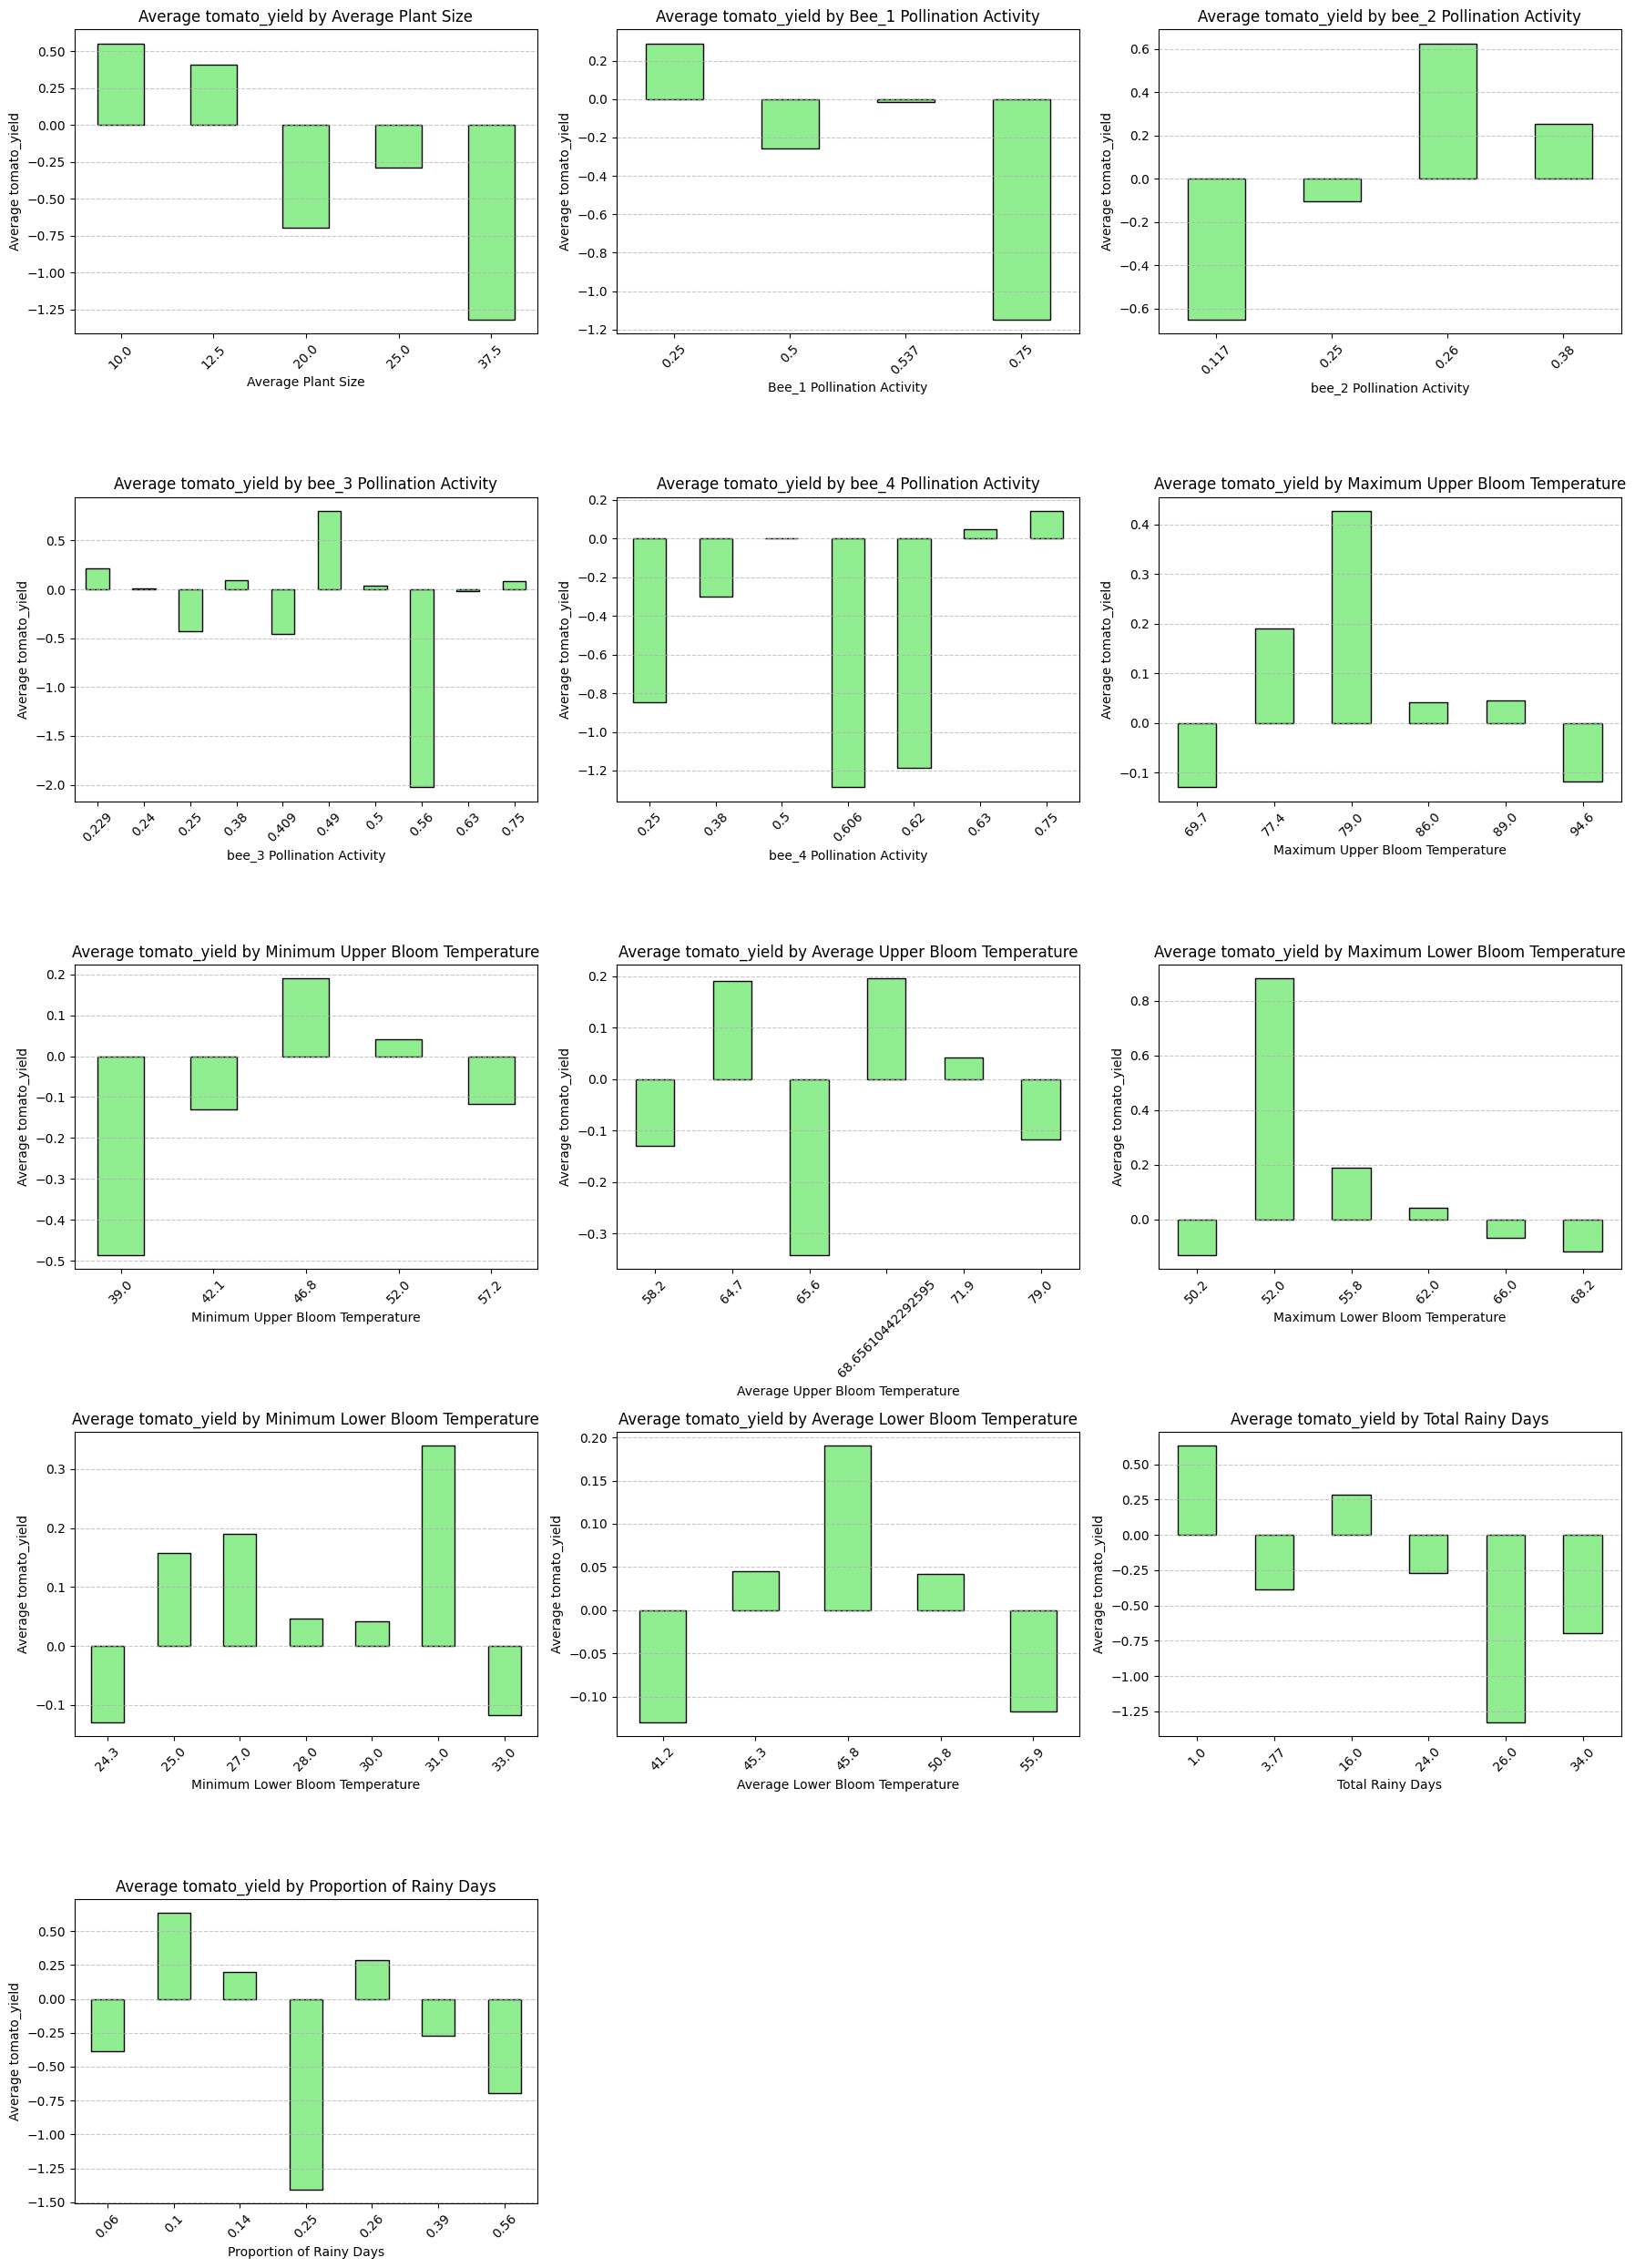


❌ No statistically significant correlation was found between the categorical variables and tomato_yield.


In [25]:
def test_categorical_vs_numeric(df, categorical_cols, numeric_col):
    results = []

    # Perform statistical tests (ANOVA + Kruskal-Wallis)
    for cat_col in categorical_cols:
        groups = [group[numeric_col].dropna().values for name, group in df.groupby(cat_col)]

        try:
            f_stat, p_anova = f_oneway(*groups)
        except:
            f_stat, p_anova = None, None

        try:
            h_stat, p_kruskal = kruskal(*groups)
        except:
            h_stat, p_kruskal = None, None

        results.append({
            'Categorical Variable': cat_col,
            'ANOVA p-value': p_anova,
            'Kruskal-Wallis p-value': p_kruskal
        })

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    display(results_df)

    # Create barplots in a grid layout
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        mean_yield = df.groupby(col)[numeric_col].mean()
        mean_yield.plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax)
        ax.set_title(f'Average {numeric_col} by {col}')
        ax.set_ylabel(f'Average {numeric_col}')
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots if any
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Report statistically significant categorical variables
    significant = results_df[results_df['Kruskal-Wallis p-value'] < 0.05]['Categorical Variable'].tolist()
    if significant:
        print(f"\n✅ Categorical variables with a statistically significant relationship to {numeric_col}:")
        for var in significant:
            print(f"- {var}")
    else:
        print(f"\n❌ No statistically significant correlation was found between the categorical variables and {numeric_col}.")

    return results_df

# Example usage
anova_results = test_categorical_vs_numeric(st_clean_df, categorical_cols, 'tomato_yield')


The grouped barplots reveal several important insights regarding the relationship between various environmental and biological factors and annual tomato yield (tomato_yield).

Pollination activity appears to be a significant factor. Specifically, higher levels of activity from Bee_1 and Bee_4 are associated with a notable decrease in average tomato yield. In contrast, Bee_2 and Bee_3 show more inconsistent and non-linear effects, with fluctuations in yield that may reflect threshold effects or interactions with other conditions in the environment.

Another interesting finding is the inverse relationship between average plant size and yield: larger plants tend to produce less yield on average. This could be due to overgrowth reducing efficiency, shading, or competition for limited resources such as nutrients or water.

As for temperature-related variables—including maximum, minimum, and average bloom temperatures, both upper and lower—they generally show weak and inconsistent influence on tomato yield. One possible exception is Maximum Upper Bloom Temperature, where a slight yield drop is observed at higher values, but overall, temperature alone does not appear to be a dominant factor in yield variation.

Finally, rainfall-related features, including Total Rainy Days and Proportion of Rainy Days, show a mild negative association with yield. More rain is generally linked to lower tomato production, potentially due to overwatering, higher humidity-related diseases, or less effective pollination. However, the pattern is not strictly linear and may be confounded by other environmental factors.

###3.5 Bonus – Analysis and Visualization of Linear Regression Between the Variables and Annual Tomato Yield


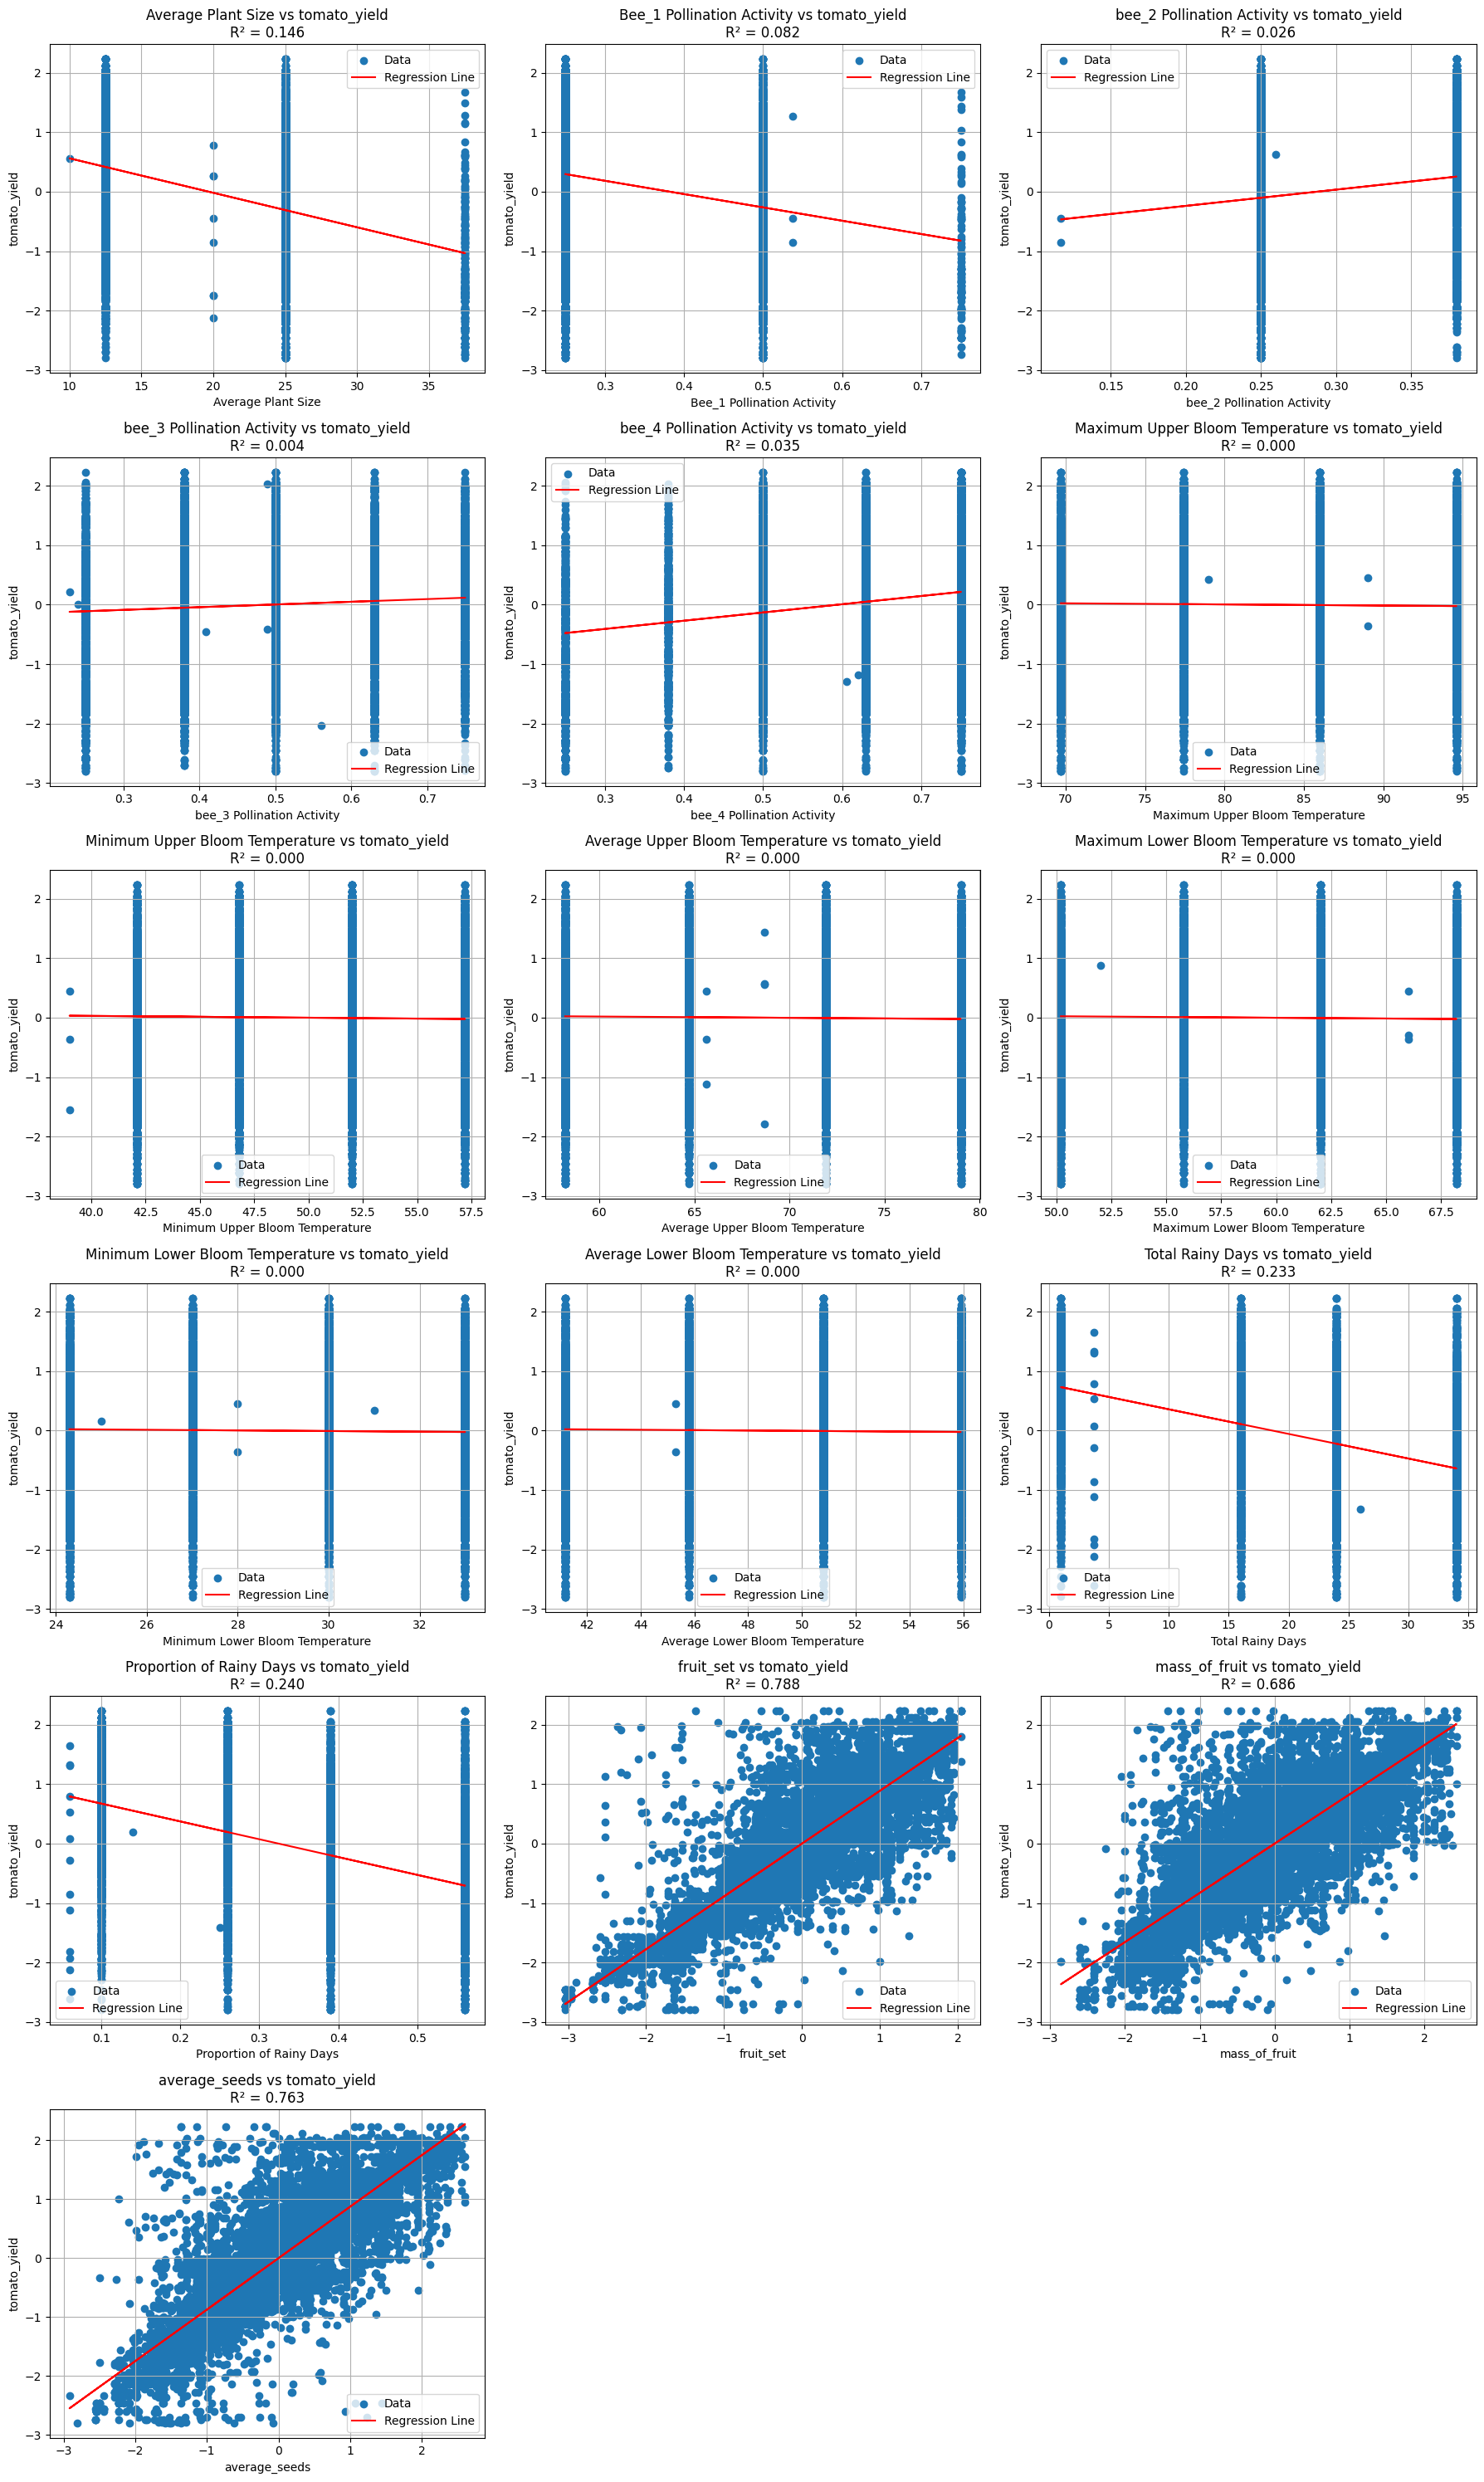

,Feature,Slope,Intercept,R2
0,fruit_set,0.887666,-3.148024e-16,0.787951
1,average_seeds,0.873695,1.217501e-15,0.763343
2,mass_of_fruit,0.828310,8.581625e-16,0.686097
3,Proportion of Rainy Days,-2.999021,9.723218e-01,0.240307
4,Total Rainy Days,-0.041411,7.724188e-01,0.232543
5,Average Plant Size,-0.057987,1.140687e+00,0.145576
6,Bee_1 Pollination Activity,-2.239251,8.556896e-01,0.082491
7,bee_4 Pollination Activity,1.384273,-8.238081e-01,0.034991
8,bee_2 Pollination Activity,2.732580,-7.853925e-01,0.025901
9,bee_3 Pollination Activity,0.454008,-2.241572e-01,0.004486


In [26]:
target_column = "tomato_yield"
ignore_columns = ["id", target_column]
results = []

# Features to analyze
features = [col for col in st_clean_df.columns if col not in ignore_columns]

# Prepare subplot grid
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Loop over features
for i, column in enumerate(features):
    X = st_clean_df[[column]].dropna()
    y = st_clean_df[target_column].loc[X.index]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Save results
    results.append({
        'Feature': column,
        'Slope': model.coef_[0],
        'Intercept': model.intercept_,
        'R2': r2
    })

    # Plot
    ax = axes[i]
    ax.scatter(X, y, label='Data')
    ax.plot(X, y_pred, color='red', label='Regression Line')
    ax.set_title(f'{column} vs {target_column}\nR² = {r2:.3f}')
    ax.set_xlabel(column)
    ax.set_ylabel(target_column)
    ax.legend()
    ax.grid(True)

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create and display summary DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


##4 - Conclusions:

This exploratory analysis revealed that features such as fruit_set, mass_of_fruit, and average_seeds show a strong linear relationship with tomato yield. Additionally, certain bee activities (especially Bee_1) and plant size exhibited meaningful, though more complex, associations. Temperature and rainfall variables showed weaker, more inconsistent influence, suggesting they may play a secondary role or interact with other factors.

Suggestions for Future Research:

Further research could involve building predictive models (e.g., linear regression, random forest, or gradient boosting) to quantify the contribution of each variable. Additionally, exploring interaction effects between bee activity and environmental conditions (like temperature or rain) may uncover non-linear dependencies. Time-series or seasonal analysis could also provide insights if temporal data is available.

